<center> <h2> Final Year Project </h2> </center>
<center> <h3> Semester 8th </h3> </center>

<center> <h3> CCDML - Cervical Cancer Diagnosis using Machine Learning</h3> </center>
<center><h4>Jini Bhanushali, Aayushi Bhimani, Dharita Desai</h4></center>


##  RESULTS

In [881]:
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import os

In [882]:
#read the data and put into dataframe
def read_data(csv):
    return pd.read_csv(csv)

In [883]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [884]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/CCDML"

In [885]:
#changing the working directory
%cd /content/gdrive/My Drive/CCDML/Dataset

/content/gdrive/My Drive/CCDML/Dataset


In [886]:
!ls

cervicalcancer.csv  cluster3.csv		LogisticRegression.pkl
cluster12.csv	    cluster42.csv		Log_ROC.png
cluster1.csv	    cluster4.csv		Model.pkl
cluster22.csv	    DecisionTreeClassifier.pkl	selected_data.csv
cluster2.csv	    KNeighborsClassifier.pkl
cluster32.csv	    LinearSVC.pkl


In [887]:
data = read_data("cervicalcancer.csv")
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0


In [888]:
data.replace("?", np.nan, inplace=True)

In [889]:
#count nan values for each column
data.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [890]:
data = data.apply(pd.to_numeric)

In [891]:
# remove columns that have less than half of the amount of rows as unknown
# replace unknown values with mean of column
def remove_unknowns(data):
    i = 0
    while i < data.shape[1]:
        if data.count().iloc[i] < data.shape[0]/2:
            data.drop(axis=1, labels=[data.columns[i]], inplace=True)
            i -= 1
        i += 1
    column_means = round(data.mean())
    data.fillna(column_means, inplace = True)
    return data

In [892]:
data = remove_unknowns(data)

Examining Distribution of Data

In [893]:
data.describe(include = "all")

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.541958,16.995338,2.257576,0.143357,1.216392,0.446278,0.686480,2.224143,0.096737,...,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644264,2.791883,1.400981,0.350641,4.057974,2.210351,0.464194,3.520111,0.295771,...,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


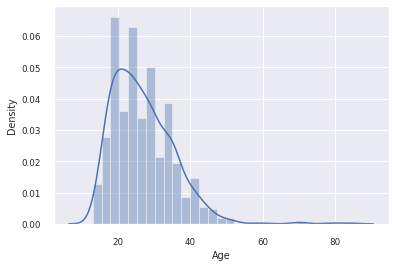

In [894]:
sns.distplot(data["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


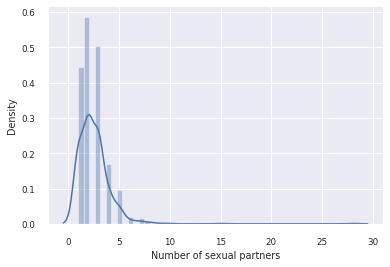

In [895]:
sns.distplot(data["Number of sexual partners"], kde_kws={'bw': .3})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


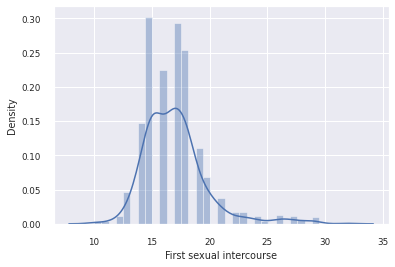

In [896]:
sns.distplot(data["First sexual intercourse"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


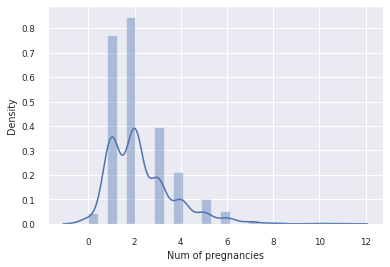

In [897]:
sns.distplot(data["Num of pregnancies"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


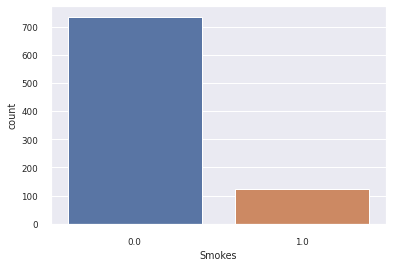

In [898]:
sns.countplot(data["Smokes"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


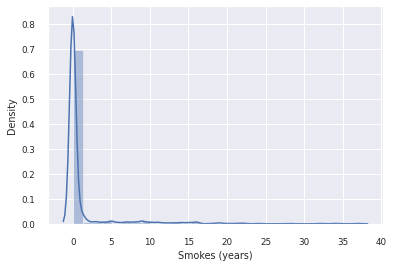

In [899]:
sns.distplot(data["Smokes (years)"], kde_kws={'bw': 0.1})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


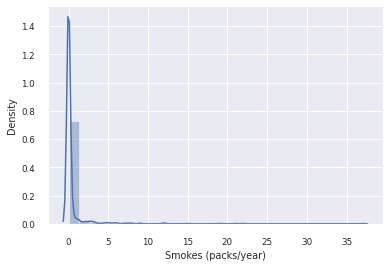

In [900]:
sns.distplot(data["Smokes (packs/year)"], kde_kws={'bw': 0.1})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


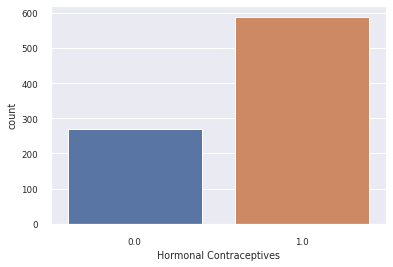

In [901]:
sns.countplot(data["Hormonal Contraceptives"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


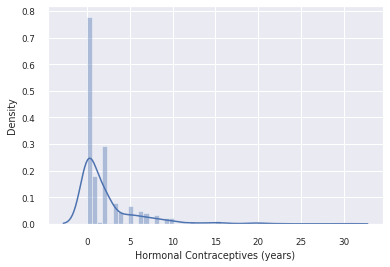

In [902]:
sns.distplot(data["Hormonal Contraceptives (years)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


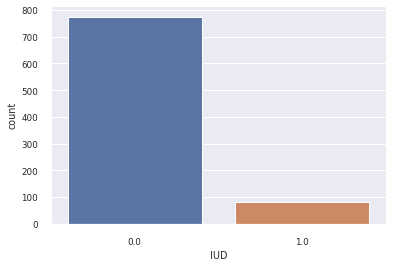

In [903]:
sns.countplot(data["IUD"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


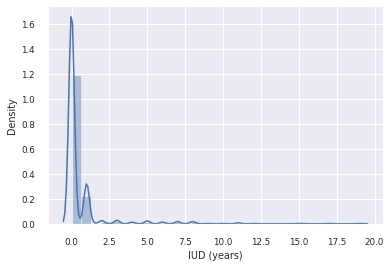

In [904]:
sns.distplot(data["IUD (years)"], kde_kws={'bw': 0.1})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


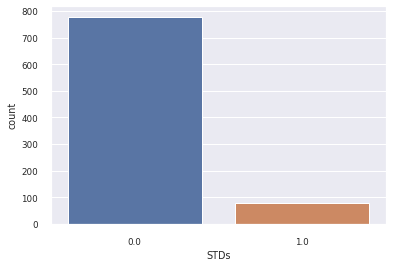

In [905]:
sns.countplot(data["STDs"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


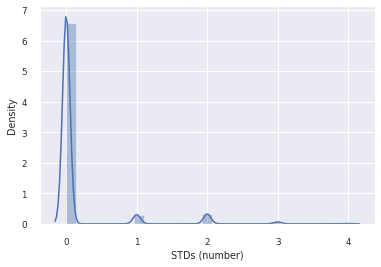

In [906]:
sns.distplot(data["STDs (number)"], kde_kws={'bw': 0.1})

In [907]:
data["STDs:condylomatosis"].value_counts()
data["STDs:cervical condylomatosis"].value_counts()

0.0    858
Name: STDs:cervical condylomatosis, dtype: int64

In [908]:
data["STDs:cervical condylomatosis"].value_counts()

0.0    858
Name: STDs:cervical condylomatosis, dtype: int64

In [909]:
data["STDs:vaginal condylomatosis"].value_counts()

0.0    854
1.0      4
Name: STDs:vaginal condylomatosis, dtype: int64

In [910]:
data["STDs:vulvo-perineal condylomatosis"].value_counts()

0.0    815
1.0     43
Name: STDs:vulvo-perineal condylomatosis, dtype: int64

In [911]:
data["STDs:syphilis"].value_counts()

0.0    840
1.0     18
Name: STDs:syphilis, dtype: int64

In [912]:
data["STDs:pelvic inflammatory disease"].value_counts()

0.0    857
1.0      1
Name: STDs:pelvic inflammatory disease, dtype: int64

In [913]:
data["STDs:genital herpes"].value_counts()

0.0    857
1.0      1
Name: STDs:genital herpes, dtype: int64

In [914]:
data["STDs:molluscum contagiosum"].value_counts()

0.0    857
1.0      1
Name: STDs:molluscum contagiosum, dtype: int64

In [915]:
data["STDs:AIDS"].value_counts()

0.0    858
Name: STDs:AIDS, dtype: int64

In [916]:
data["STDs:HIV"].value_counts()

0.0    840
1.0     18
Name: STDs:HIV, dtype: int64

In [917]:
data["STDs:Hepatitis B"].value_counts()

0.0    857
1.0      1
Name: STDs:Hepatitis B, dtype: int64

In [918]:
data["STDs:HPV"].value_counts()

0.0    856
1.0      2
Name: STDs:HPV, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


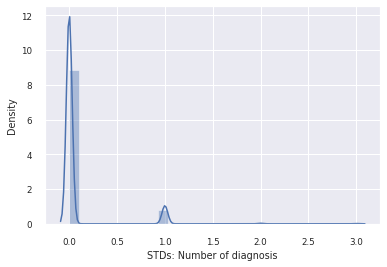

In [919]:
sns.distplot(data["STDs: Number of diagnosis"], kde_kws={'bw': 0.1})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


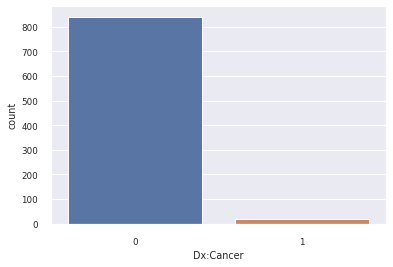

In [920]:
sns.countplot(data["Dx:Cancer"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


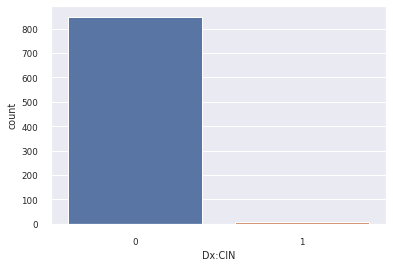

In [921]:
sns.countplot(data["Dx:CIN"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


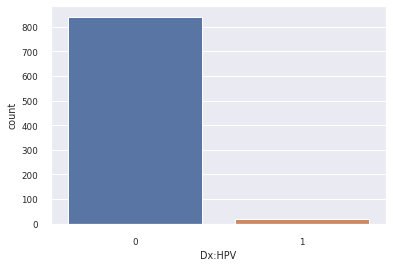

In [922]:
sns.countplot(data["Dx:HPV"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


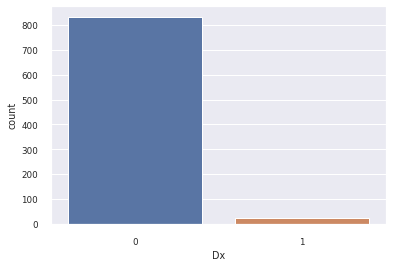

In [923]:
sns.countplot(data["Dx"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


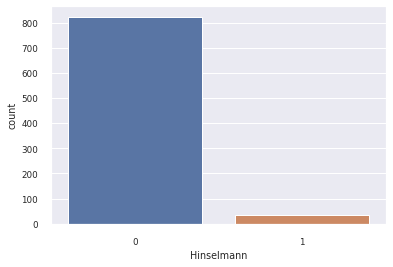

In [924]:
sns.countplot(data["Hinselmann"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


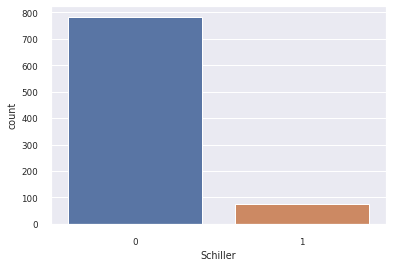

In [925]:
sns.countplot(data["Schiller"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


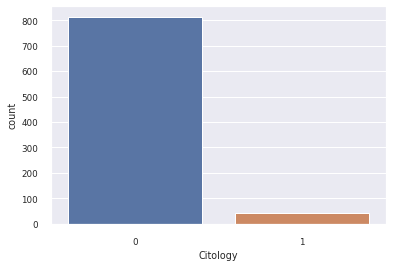

In [926]:
sns.countplot(data["Citology"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


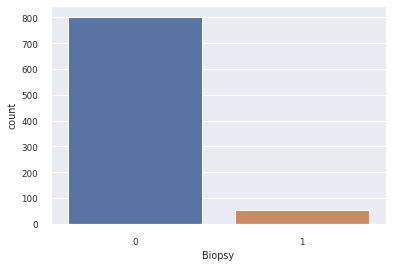

In [927]:
sns.countplot(data["Biopsy"])

In [928]:
#the risk factors are the features we are going to analyze
features = (data.iloc[0:858, 0:30])

#the four diagnoses are the target variables
hinselmann = data["Hinselmann"]
schiller = data["Schiller"]
citology = data["Citology"]
biopsy = data["Biopsy"]

In [929]:
#define a dictionary of estimators for model
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Support Vector Machine': LinearSVC(max_iter=1000000),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()}

In [930]:
#function that splits the data using percentage split (75% train 25% test)
def split_data(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)
    return X_train, X_test, y_train, y_test

In [931]:
#split the data using percentage split
X_train_h, X_test_h, y_train_h, y_test_h = split_data(features, hinselmann)
X_train_s, X_test_s, y_train_s, y_test_s = split_data(features, schiller)
X_train_c, X_test_c, y_train_c, y_test_c = split_data(features, citology)
X_train_b, X_test_b, y_train_b, y_test_b = split_data(features, biopsy)

In [932]:
# preprocess using MinMaxScaler
def preprocessor(train, test):
    scaler = MinMaxScaler().fit(train)
    
    #scale testing and training sets
    X_train_scaled = scaler.transform(train)
    X_test_scaled = scaler.transform(test)

    return X_train_scaled, X_test_scaled

In [933]:
#preprocess the data
X_train_h_scaled, X_test_h_scaled = preprocessor(X_train_h, X_test_h)
X_train_s_scaled, X_test_s_scaled = preprocessor(X_train_s, X_test_s)
X_train_c_scaled, X_test_c_scaled = preprocessor(X_train_c, X_test_c)
X_train_b_scaled, X_test_b_scaled = preprocessor(X_train_b, X_test_b)

In [934]:
#define dictionary of feature selection methods
feat_select_dict = {"UNI" : SelectKBest(score_func=f_classif, k = 3),
                    "MB" : SelectFromModel(DecisionTreeRegressor(random_state = 3000)),
                   "RFE" : RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)}

In [935]:
#set up dataframes to hold results of selecting features vs using all of the features
prelim_train_results = pd.DataFrame(index = ["Acc_All", "Acc_UNI", "Acc_MB", "Acc_RFE"])
prelim_test_results = pd.DataFrame(index = ["Acc_All", "Acc_UNI", "Acc_MB", "Acc_RFE"])

In [936]:
# Feature selection for each target variable and each selection method
def feature_selection(feat_select_dict, xtrain, xtest, ytrain, ytest, target):
    ml_model_all_train = LogisticRegression().fit(X=xtrain, y=ytrain)
    ml_model_all_test = LogisticRegression().fit(X=xtest, y=ytest)
    prelim_train_results.loc["Acc_All", target] = ml_model_all_train.score(xtrain, ytrain)
    prelim_test_results.loc["Acc_All", target] = ml_model_all_test.score(xtest, ytest)
    models = []
    
    for name, method in feat_select_dict.items():
        model = method
        model.fit(xtrain, ytrain)
        xtrain_selected = model.transform(xtrain)
        xtest_selected = model.transform(xtest)
        models.append(model)
        ml_model_selected_train = LogisticRegression().fit(X=xtrain_selected, y=ytrain)
        ml_model_selected_test = LogisticRegression().fit(X=xtest_selected, y=ytest)
        prelim_train_results.loc["Acc_" + name, target] = ml_model_selected_train.score(xtrain_selected, ytrain)
        prelim_test_results.loc["Acc_" + name, target] = ml_model_selected_test.score(xtest_selected, ytest)
    return prelim_train_results, prelim_test_results, models

In [937]:
prelim_train_results, prelim_test_results, models_h = feature_selection(feat_select_dict, X_train_h_scaled, X_test_h_scaled, y_train_h, y_test_h, "Hinselmann")
prelim_train_results, prelim_test_results, models_s = feature_selection(feat_select_dict, X_train_s_scaled, X_test_s_scaled, y_train_s, y_test_s, "Shiller")
prelim_train_results, prelim_test_results, models_c = feature_selection(feat_select_dict, X_train_c_scaled, X_test_c_scaled, y_train_c, y_test_c, "Citology")
prelim_train_results, prelim_test_results, models_b =  feature_selection(feat_select_dict, X_train_b_scaled, X_test_b_scaled, y_train_b, y_test_b, "Biopsy")

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14 18 19 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14 18 19 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14 18 19 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_i

In [938]:
prelim_train_results

,Hinselmann,Shiller,Citology,Biopsy
Acc_All,0.956454,0.912908,0.947123,0.936236
Acc_UNI,0.956454,0.912908,0.947123,0.936236
Acc_MB,0.956454,0.912908,0.947123,0.936236
Acc_RFE,0.956454,0.912908,0.947123,0.936236


In [939]:
prelim_test_results

,Hinselmann,Shiller,Citology,Biopsy
Acc_All,0.967442,0.916279,0.953488,0.934884
Acc_UNI,0.967442,0.916279,0.953488,0.934884
Acc_MB,0.967442,0.916279,0.953488,0.934884
Acc_RFE,0.967442,0.916279,0.953488,0.934884


In [940]:
prelim_train_results.mean(axis = 1)

Acc_All    0.93818
Acc_UNI    0.93818
Acc_MB     0.93818
Acc_RFE    0.93818
dtype: float64

In [941]:
prelim_test_results.mean(axis = 1)

Acc_All    0.943023
Acc_UNI    0.943023
Acc_MB     0.943023
Acc_RFE    0.943023
dtype: float64

Feature selection methods: Univariate feature selection, Model-based feature selection and RFE, extracting three features using each method.

In [942]:
features_list = []
#Selected features extraction
def extract_features(model):
    list = [i for i, val in enumerate(model.get_support()) if val]
    index=0
    while index < 3:
        print(features.columns[list][index])
        features_list.append(features.columns[list][index])
        index += 1

    return features_list

In [943]:
extract_features(models_h[0])
extract_features(models_h[1])
extract_features(models_h[2])
extract_features(models_s[0])
extract_features(models_s[1])
extract_features(models_s[2])
extract_features(models_c[0])
extract_features(models_c[1])
extract_features(models_c[2])
extract_features(models_b[0])
extract_features(models_b[1])
features_list = extract_features(models_b[2])

Dx:Cancer
Dx:HPV
Dx
Age
Number of sexual partners
First sexual intercourse
Age
Number of sexual partners
First sexual intercourse
Dx:Cancer
Dx:HPV
Dx
Age
Number of sexual partners
First sexual intercourse
Age
Number of sexual partners
First sexual intercourse
Dx:Cancer
Dx:HPV
Dx
Age
Number of sexual partners
First sexual intercourse
Age
Number of sexual partners
First sexual intercourse
Dx:Cancer
Dx:HPV
Dx
Age
Number of sexual partners
First sexual intercourse
Age
Number of sexual partners
First sexual intercourse


In [944]:
#remove duplicates in the list
features_list = list(set(features_list))
features_list

['Age',
 'Dx:HPV',
 'Dx:Cancer',
 'First sexual intercourse',
 'Dx',
 'Number of sexual partners']

In [945]:
#remove columns that are not the selected features
def select_features_in_data(x, features, columns_list):
    x_selected = pd.DataFrame(x, columns = features)
    x_selected = x_selected.drop(columns = [col for col in x_selected if col not in columns_list])
    return x_selected

In [946]:
X_train_h_selected = select_features_in_data(X_train_h_scaled, list(features.columns), features_list)
X_test_h_selected = select_features_in_data(X_test_h_scaled, list(features.columns), features_list)
X_train_s_selected = select_features_in_data(X_train_s_scaled, list(features.columns), features_list)
X_test_s_selected = select_features_in_data(X_test_s_scaled, list(features.columns), features_list)
X_train_c_selected = select_features_in_data(X_train_c_scaled, list(features.columns), features_list)
X_test_c_selected = select_features_in_data(X_test_c_scaled, list(features.columns), features_list)
X_train_b_selected = select_features_in_data(X_train_b_scaled, list(features.columns), features_list)
X_test_b_selected = select_features_in_data(X_test_b_scaled, list(features.columns), features_list)

In [947]:
X_test_h_selected

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx
0,0.185714,0.111111,0.272727,0.0,0.0,0.0
1,0.214286,0.111111,0.000000,0.0,0.0,0.0
2,0.071429,0.074074,0.318182,0.0,0.0,0.0
3,0.214286,0.148148,0.454545,0.0,0.0,0.0
4,0.157143,0.074074,0.318182,0.0,0.0,0.0
...,...,...,...,...,...,...
210,0.242857,0.000000,0.454545,0.0,0.0,0.0
211,0.171429,0.037037,0.409091,0.0,0.0,0.0
212,0.057143,0.000000,0.363636,0.0,0.0,0.0
213,0.057143,0.111111,0.227273,0.0,0.0,0.0


In [948]:
X_train_h_selected

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx
0,0.242857,0.111111,0.272727,0.0,0.0,0.0
1,0.100000,0.074074,0.318182,0.0,0.0,1.0
2,0.214286,0.111111,0.363636,0.0,0.0,0.0
3,0.185714,0.000000,0.272727,0.0,0.0,0.0
4,0.157143,0.037037,0.363636,0.0,0.0,0.0
...,...,...,...,...,...,...
638,0.414286,0.074074,0.318182,0.0,0.0,0.0
639,0.357143,0.148148,0.590909,0.0,0.0,0.0
640,0.171429,0.037037,0.227273,0.0,0.0,1.0
641,0.314286,0.000000,0.818182,0.0,0.0,0.0


In [949]:
features_list

['Age',
 'Dx:HPV',
 'Dx:Cancer',
 'First sexual intercourse',
 'Dx',
 'Number of sexual partners']

In [950]:
#put the four target variables in a dataframe
features_list.append("Hinselmann")
features_list.append("Schiller")
features_list.append("Citology")
features_list.append("Biopsy")

#show dataframe of selected data
selected_data = data.drop(columns = [col for col in data if col not in features_list])
selected_data

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,0,0,0,0,0,0,0
1,15,1.0,14.0,0,0,0,0,0,0,0
2,34,1.0,17.0,0,0,0,0,0,0,0
3,52,5.0,16.0,1,1,0,0,0,0,0
4,46,3.0,21.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0,0,0,0,0,0,0
854,32,2.0,19.0,0,0,0,0,0,0,0
855,25,2.0,17.0,0,0,0,0,0,1,0
856,33,2.0,24.0,0,0,0,0,0,0,0


### 3.2. Data Exploration


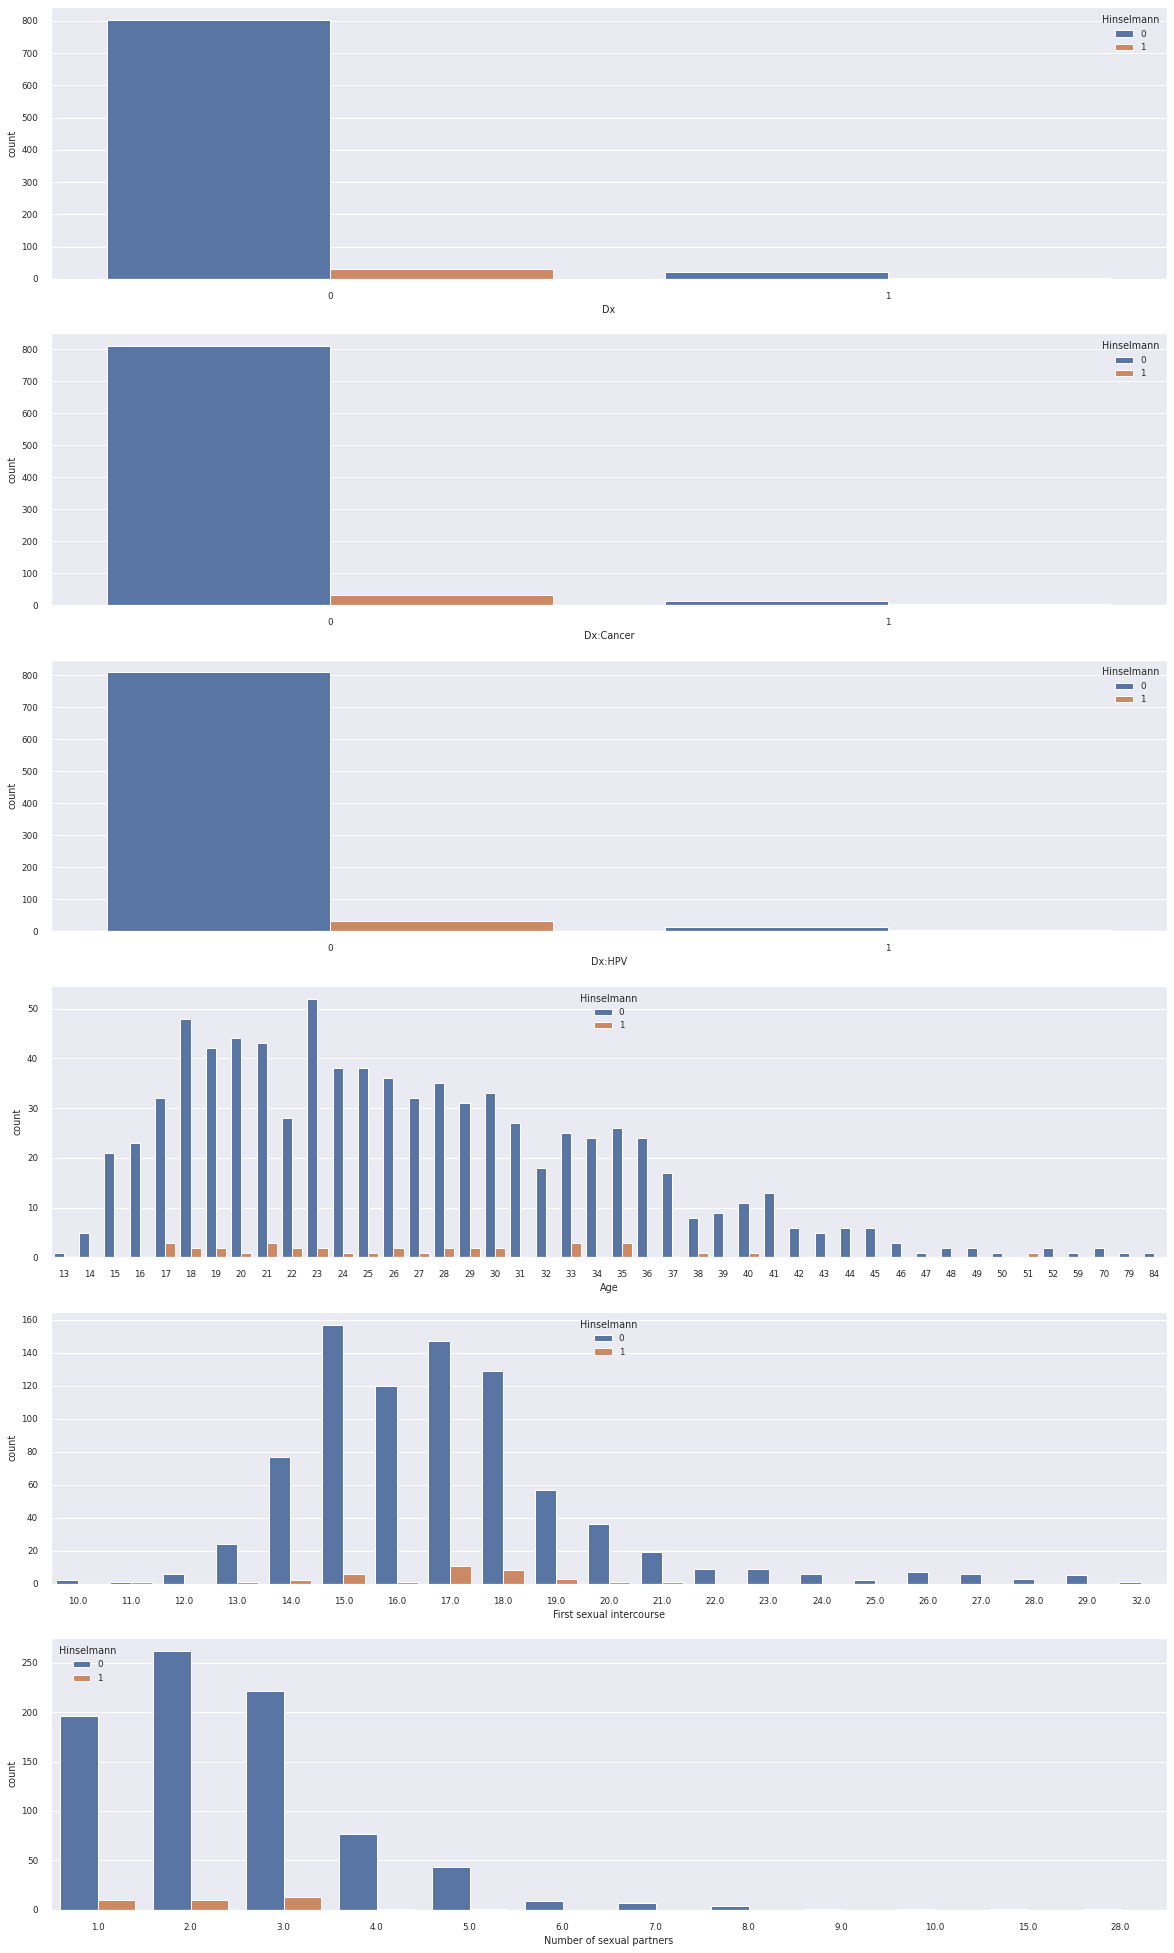

In [951]:
# using countplot to visualize the effect of each feature on target "Hinselmann"

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, figsize = (20,35))

dx_Hinselmann = sns.countplot(x='Dx', hue='Hinselmann', data=selected_data, ax=ax1)

dx_cancer_Hinselmann = sns.countplot(x='Dx:Cancer', hue='Hinselmann', data=selected_data, ax=ax2)

dx_hpv_Hinselmann = sns.countplot(x='Dx:HPV', hue='Hinselmann',data=selected_data, ax=ax3)

age_Hinselmann = sns.countplot(x="Age", hue="Hinselmann", data=selected_data, ax=ax4)

first_sex_Hinselmann = sns.countplot(x='First sexual intercourse', hue="Hinselmann", data=selected_data, ax=ax5)

num_partners_Hinselmann = sns.countplot(x='Number of sexual partners', hue="Hinselmann", data=selected_data, ax=ax6)


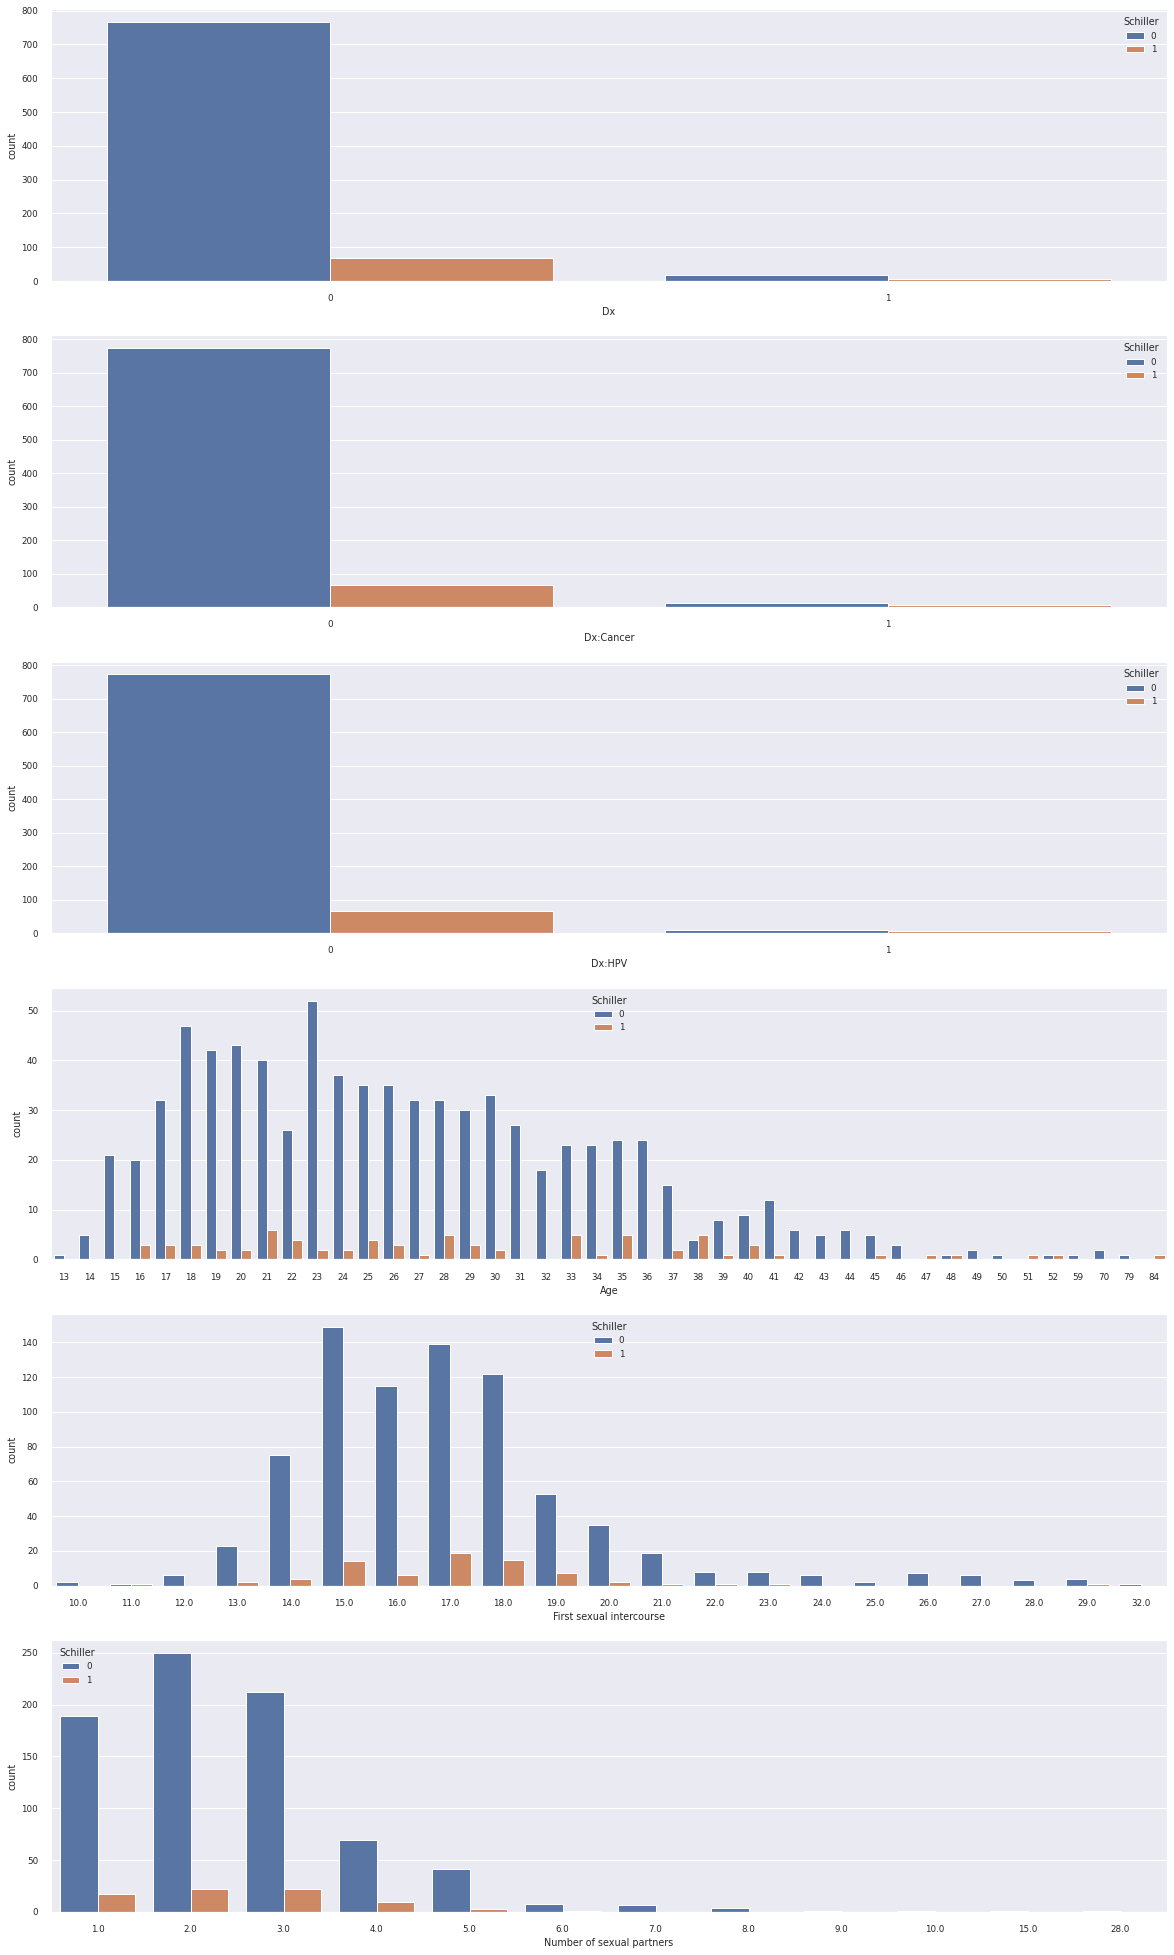

In [952]:
# using countplot to visualize the effect of each feature on target 'Schiller'

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, figsize = (20,35))

dx_Schiller = sns.countplot(x='Dx', hue='Schiller', data=selected_data, ax=ax1)

dx_cancer_Schiller = sns.countplot(x='Dx:Cancer', hue='Schiller', data=selected_data, ax=ax2)

dx_hpv_Schiller = sns.countplot(x='Dx:HPV', hue='Schiller',data=selected_data, ax=ax3)

age_Schiller = sns.countplot(x="Age", hue='Schiller', data=selected_data, ax=ax4)

first_sex_Schiller = sns.countplot(x='First sexual intercourse', hue='Schiller', data=selected_data, ax=ax5)

num_partners_Schiller = sns.countplot(x='Number of sexual partners', hue='Schiller', data=selected_data, ax=ax6)

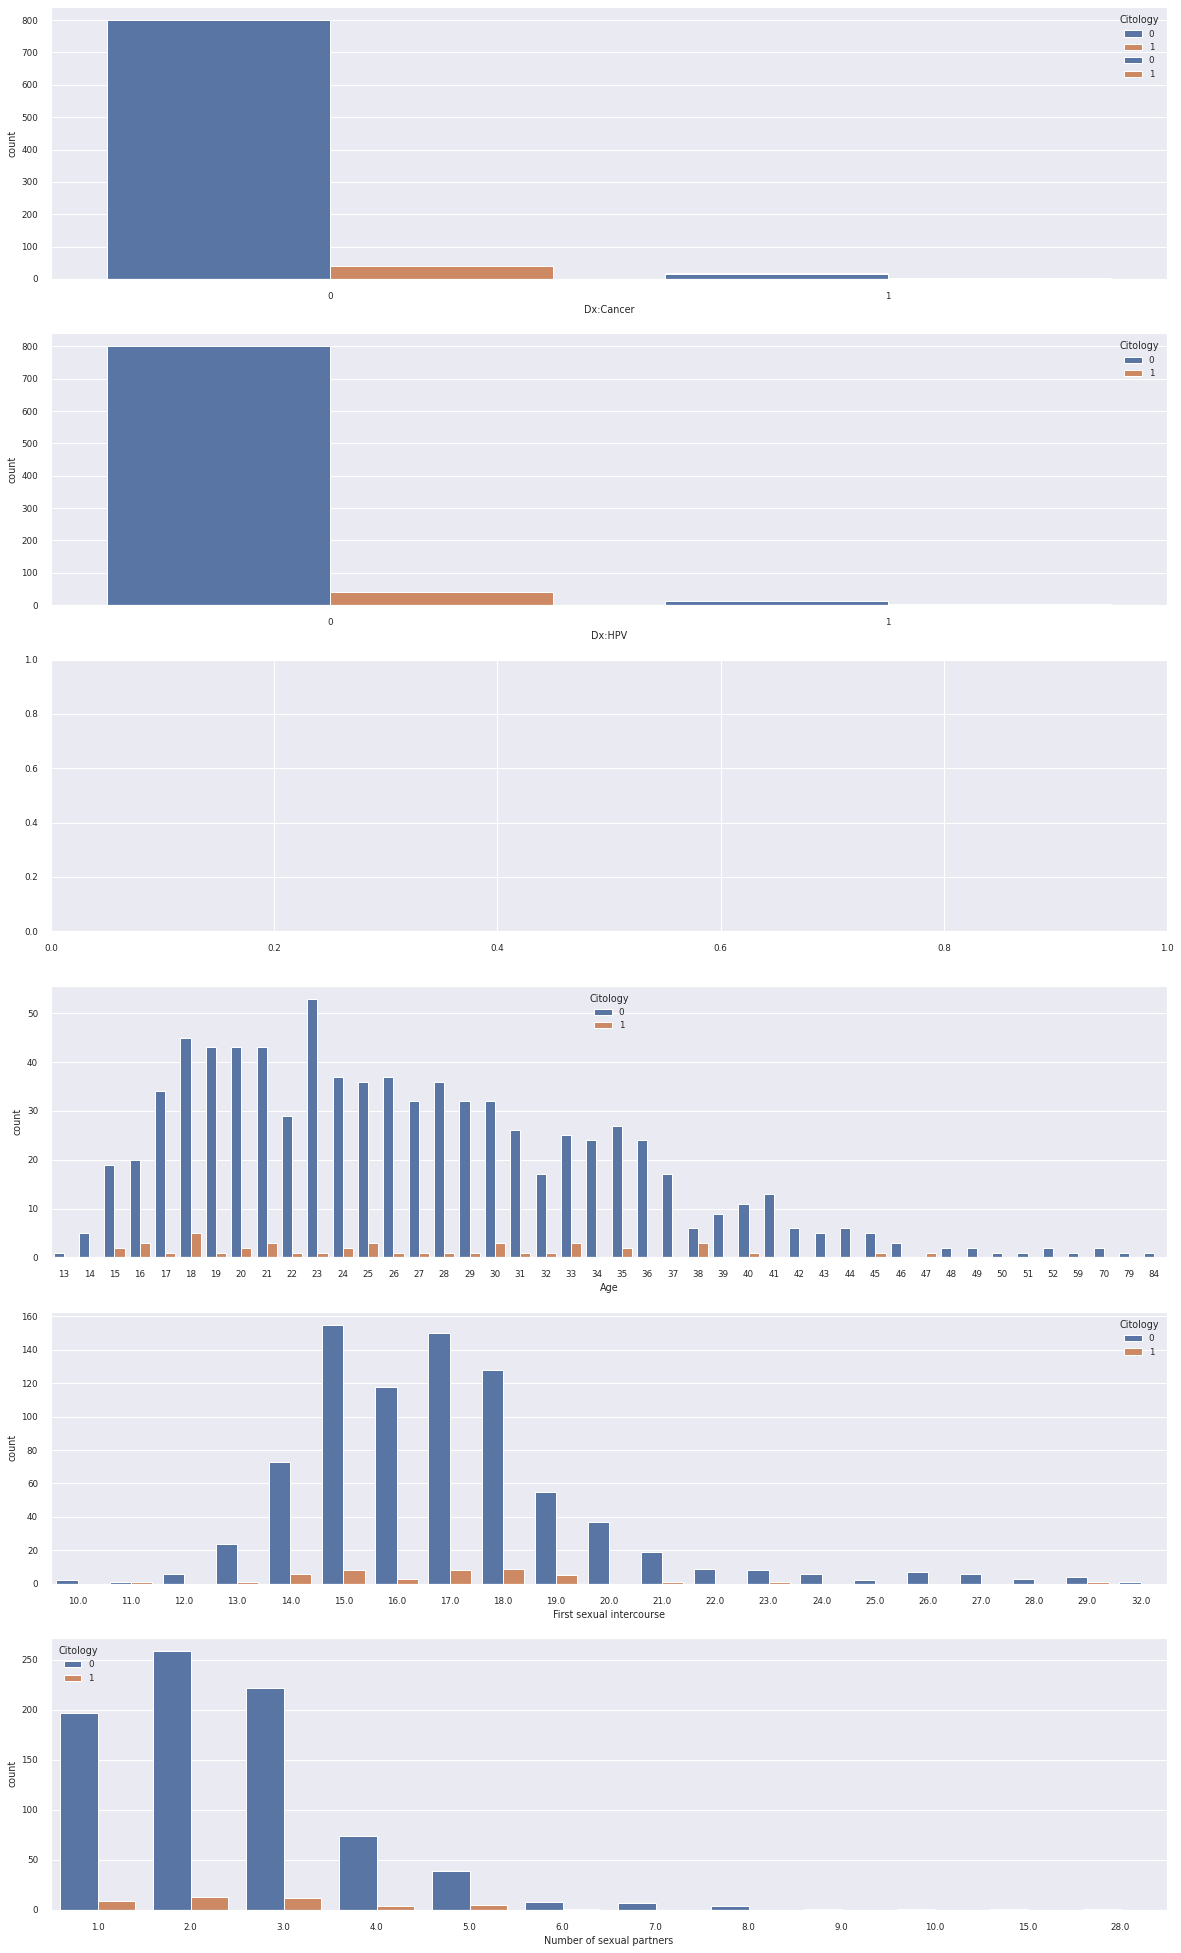

In [953]:
# using countplot to visualize the effect of each feature on target Citology'

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, figsize = (20,35))

dx_Citology = sns.countplot(x='Dx', hue='Citology', data=selected_data, ax=ax1)

dx_cancer_Citology = sns.countplot(x='Dx:Cancer', hue='Citology', data=selected_data, ax=ax1)

dx_hpv_Citology = sns.countplot(x='Dx:HPV', hue='Citology',data=selected_data, ax=ax2)

age_Citology = sns.countplot(x="Age", hue='Citology', data=selected_data, ax=ax4)

first_sex_Citology = sns.countplot(x='First sexual intercourse', hue='Citology', data=selected_data, ax=ax5)

num_partners_Citology = sns.countplot(x='Number of sexual partners', hue='Citology', data=selected_data, ax=ax6)


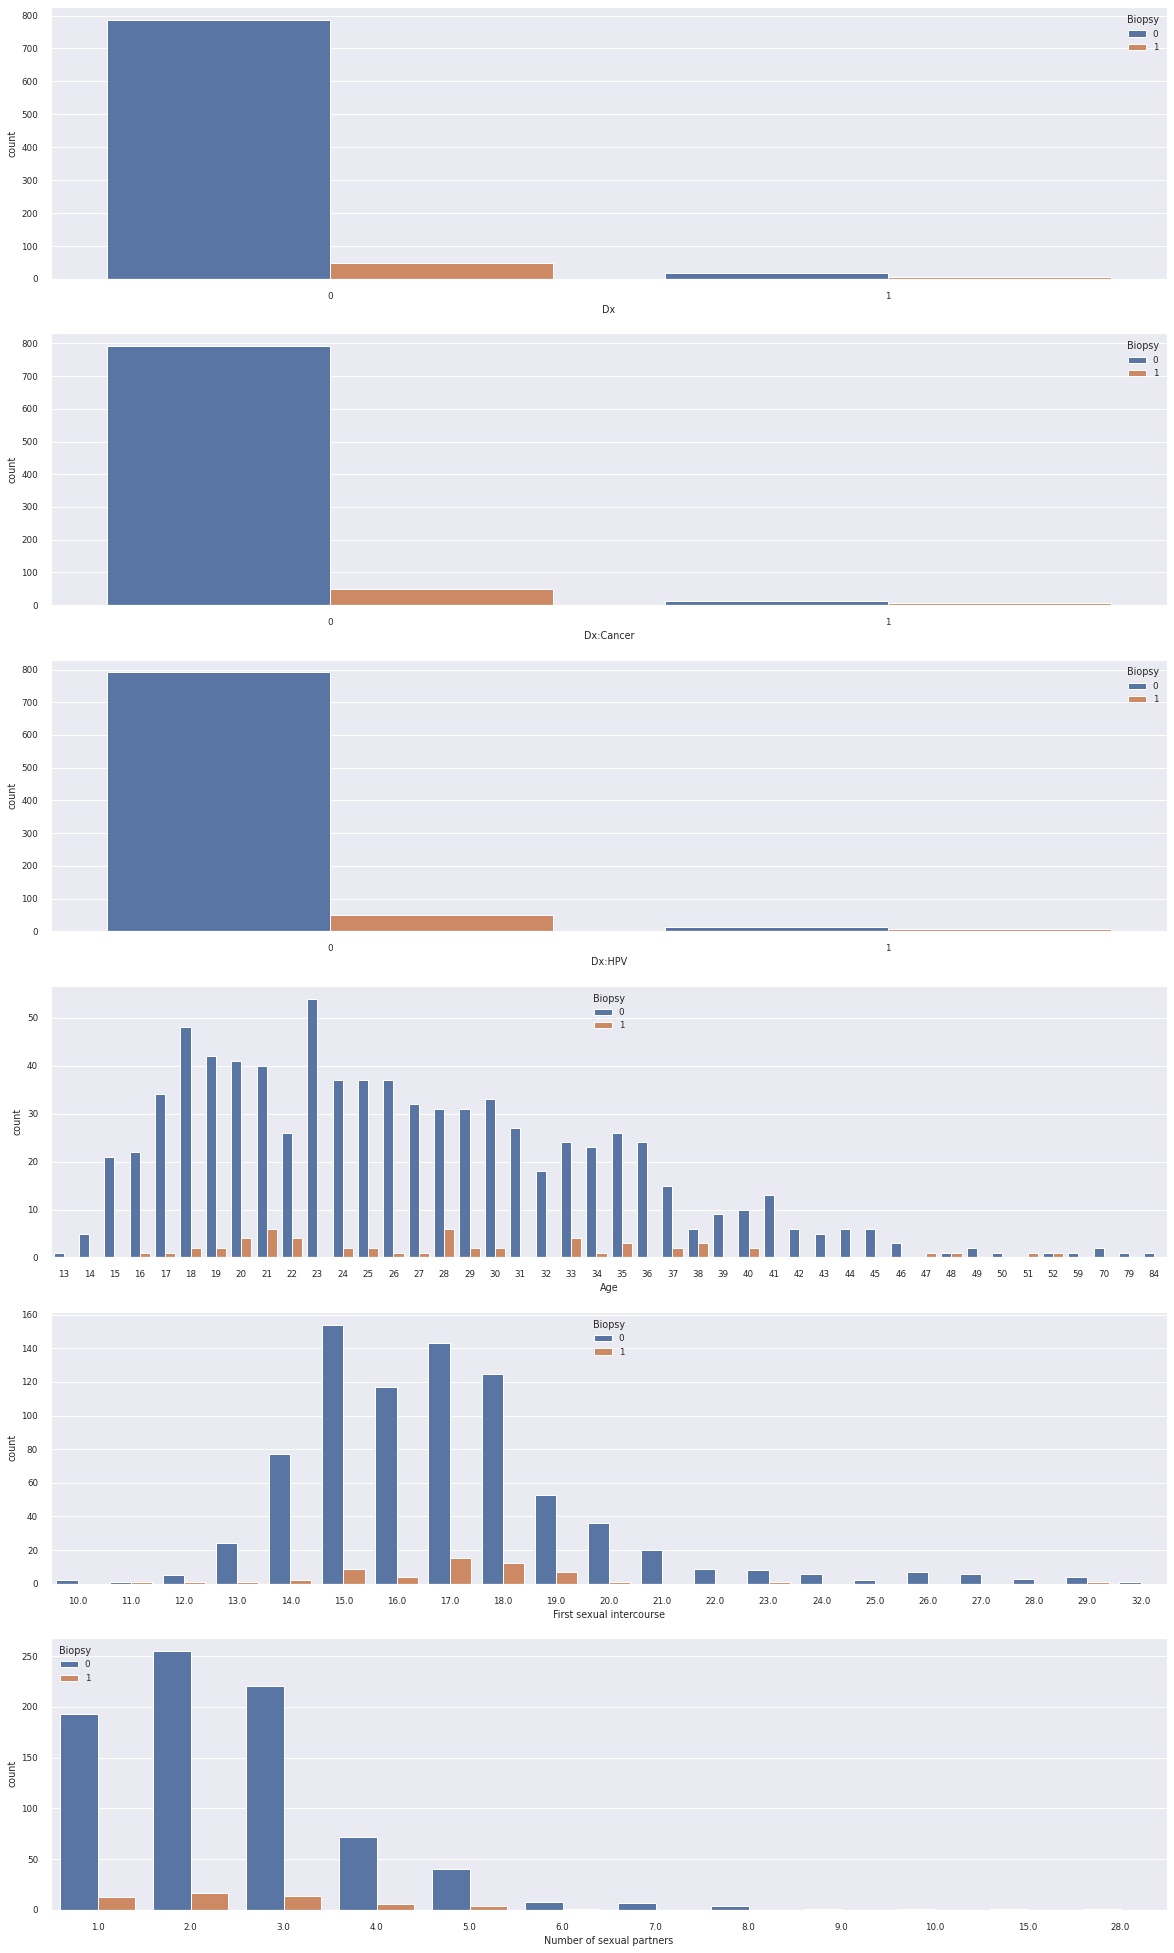

In [954]:
# using countplot to visualize the effect of each feature on target 'Biopsy'

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6, 1, figsize = (20,35))

dx_Biopsy = sns.countplot(x='Dx', hue='Biopsy', data=selected_data, ax=ax1)

dx_cancer_Biopsy = sns.countplot(x='Dx:Cancer', hue='Biopsy', data=selected_data, ax=ax2)

dx_hpv_Biopsy = sns.countplot(x='Dx:HPV', hue='Biopsy',data=selected_data, ax=ax3)

age_Biopsy = sns.countplot(x="Age", hue='Biopsy', data=selected_data, ax=ax4)

first_sex_Biopsy = sns.countplot(x='First sexual intercourse', hue='Biopsy', data=selected_data, ax=ax5)

num_partners_Biopsy = sns.countplot(x='Number of sexual partners', hue='Biopsy', data=selected_data, ax=ax6)

In [955]:
#CLEANING: clean up strings so they can used as numbers
for columns in selected_data:
    selected_data[columns] = pd.to_numeric(selected_data[columns])

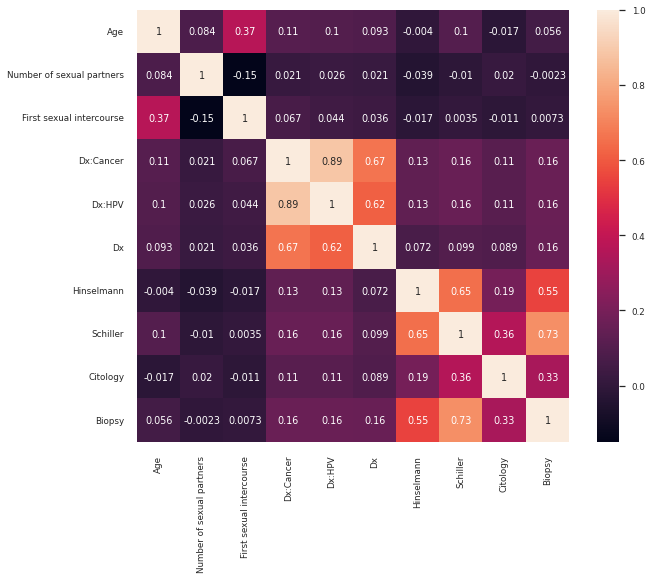

In [956]:
# generate the heatmap to visualize the correlation between each variable

# heatmap showing correlations between all variables
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(selected_data.corr(), square=True, annot=True)
plt.subplots_adjust(bottom=0.28)
plt.show()

In [957]:
#drop Dx:Cancer column because of its strong positive correlation to Dx:HPV
selected_feature_data = [X_train_h_selected, X_test_h_selected, X_train_s_selected, X_test_s_selected , X_train_c_selected, X_test_c_selected, 
                X_train_b_selected, X_test_b_selected]
for df in selected_feature_data:
    df.drop("Dx:Cancer", axis=1, inplace = True)

In [958]:
df

,Age,Number of sexual partners,First sexual intercourse,Dx:HPV,Dx
0,0.185714,0.111111,0.272727,0.0,0.0
1,0.214286,0.111111,0.000000,0.0,0.0
2,0.071429,0.074074,0.318182,0.0,0.0
3,0.214286,0.148148,0.454545,0.0,0.0
4,0.157143,0.074074,0.318182,0.0,0.0
...,...,...,...,...,...
210,0.242857,0.000000,0.454545,0.0,0.0
211,0.171429,0.037037,0.409091,0.0,0.0
212,0.057143,0.000000,0.363636,0.0,0.0
213,0.057143,0.111111,0.227273,0.0,0.0


### 3.3. Algorithms

Applying Machine Learning Algorithms

In [959]:
#create data frame to hold all results
df_accuracy = pd.DataFrame(index=["Accuracy-Selected", "Accuracy-All"])
df_f1 = pd.DataFrame(index=["F1 Score-Selected", "F1 Score-All"])

In [960]:
#function that applies the algorithms to the data
def apply_algorithms(target, features, x_train, x_test, ytrain, ytest):
    for estimator_name, estimator_object in estimators.items():
        #fit scaled sets to model
        estimator_object.fit(X=x_train, y=ytrain)
        #make predictions on the test set
        predicted = estimator_object.predict(X=x_test)
        expected = ytest
        #display classification metric results
        accuracy = estimator_object.score(x_test, ytest)
        f1score = f1_score(y_true=expected, y_pred=predicted, average=None)[0]
        df_accuracy.loc["Accuracy-" + features, target + ": " + estimator_name] = accuracy
        df_f1.loc["F1 Score-" + features, target + ": " + estimator_name] = f1score
        print(target)
        print(estimator_name + ": \n\t" + "Prediction accuracy on the test data:", f"{accuracy:.2%}" + "\n")
        print("\tF1 Score: " + str(f1score) + "\n")

In [961]:
#results
print('TEST RESULTS WHEN ONLY SELECTED FEATURES USED:')
print('___________________________________________\n')
print('With Selected Features')
apply_algorithms("Hinselmann", "Selected", X_train_h_selected, X_test_h_selected, y_train_h, y_test_h)
apply_algorithms("Schiller", "Selected", X_train_s_selected, X_test_s_selected, y_train_s, y_test_s)
apply_algorithms("Citology", "Selected", X_train_c_selected, X_test_c_selected, y_train_c, y_test_c)
apply_algorithms("Biopsy", "Selected", X_train_b_selected, X_test_b_selected, y_train_b, y_test_b)
print('\nTEST RESULTS WHEN ALL FEATURES USED:')
print('____________________________________\n')
print('With All Features')
apply_algorithms("Hinselmann", "All", X_train_h_scaled, X_test_h_scaled, y_train_h, y_test_h)
apply_algorithms("Schiller", "All", X_train_s_scaled, X_test_s_scaled, y_train_s, y_test_s)
apply_algorithms("Citology", "All", X_train_c_scaled, X_test_c_scaled, y_train_c, y_test_c)
apply_algorithms("Biopsy", "All", X_train_b_scaled, X_test_b_scaled, y_train_b, y_test_b)

TEST RESULTS WHEN ONLY SELECTED FEATURES USED:
___________________________________________

With Selected Features
Hinselmann
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 96.74%

	F1 Score: 0.983451536643026

Hinselmann
Support Vector Machine: 
	Prediction accuracy on the test data: 96.74%

	F1 Score: 0.983451536643026

Hinselmann
Logistic Regression: 
	Prediction accuracy on the test data: 96.74%

	F1 Score: 0.983451536643026

Hinselmann
Decision Tree: 
	Prediction accuracy on the test data: 92.09%

	F1 Score: 0.9588377723970944

Schiller
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 89.77%

	F1 Score: 0.946078431372549

Schiller
Support Vector Machine: 
	Prediction accuracy on the test data: 90.23%

	F1 Score: 0.9486552567237164

Schiller
Logistic Regression: 
	Prediction accuracy on the test data: 91.63%

	F1 Score: 0.9563106796116505

Schiller
Decision Tree: 
	Prediction accuracy on the test data: 88.84%

	F1 Score: 0.9405940594059405

Citology
k-Neares

In [962]:
#display data frame of accuracies
df_accuracy

,Hinselmann: k-Nearest Neighbor,Hinselmann: Support Vector Machine,Hinselmann: Logistic Regression,Hinselmann: Decision Tree,Schiller: k-Nearest Neighbor,Schiller: Support Vector Machine,Schiller: Logistic Regression,Schiller: Decision Tree,Citology: k-Nearest Neighbor,Citology: Support Vector Machine,Citology: Logistic Regression,Citology: Decision Tree,Biopsy: k-Nearest Neighbor,Biopsy: Support Vector Machine,Biopsy: Logistic Regression,Biopsy: Decision Tree
Accuracy-Selected,0.967442,0.967442,0.967442,0.920930,0.897674,0.902326,0.916279,0.888372,0.944186,0.953488,0.953488,0.893023,0.920930,0.934884,0.934884,0.902326
Accuracy-All,0.967442,0.962791,0.967442,0.893023,0.911628,0.911628,0.911628,0.841860,0.958140,0.953488,0.953488,0.902326,0.930233,0.925581,0.930233,0.855814


In [963]:
#Average accuracy of using all features vs the selected features
df_accuracy.mean(axis = 1)

Accuracy-Selected    0.929070
Accuracy-All         0.923547
dtype: float64

In [964]:
#Calculate average by algorithm
def calc_avg_for_algorithms(df, algorithm):
    list = [column for column in df.columns.tolist() if algorithm in column]
    return pd.DataFrame(data = df[list]).mean(axis = 1)

In [965]:
average_accuracies = {"KNN" : calc_avg_for_algorithms(df_accuracy, "Neighbor"),
            "SVM": calc_avg_for_algorithms(df_accuracy, "Support"),
            "Logistic Regression": calc_avg_for_algorithms(df_accuracy, "Logistic"),
            "Decision Tree": calc_avg_for_algorithms(df_accuracy, "Decision Tree")}

In [966]:
pd.DataFrame(average_accuracies)

,KNN,SVM,Logistic Regression,Decision Tree
Accuracy-Selected,0.932558,0.939535,0.943023,0.901163
Accuracy-All,0.941860,0.938372,0.940698,0.873256


In [967]:
#display dataframe of f1 scores
df_f1

,Hinselmann: k-Nearest Neighbor,Hinselmann: Support Vector Machine,Hinselmann: Logistic Regression,Hinselmann: Decision Tree,Schiller: k-Nearest Neighbor,Schiller: Support Vector Machine,Schiller: Logistic Regression,Schiller: Decision Tree,Citology: k-Nearest Neighbor,Citology: Support Vector Machine,Citology: Logistic Regression,Citology: Decision Tree,Biopsy: k-Nearest Neighbor,Biopsy: Support Vector Machine,Biopsy: Logistic Regression,Biopsy: Decision Tree
F1 Score-Selected,0.983452,0.983452,0.983452,0.958838,0.946078,0.948655,0.956311,0.940594,0.971292,0.97619,0.97619,0.943489,0.958838,0.966346,0.966346,0.948148
F1 Score-All,0.983452,0.981043,0.983452,0.943210,0.953771,0.953771,0.953771,0.912821,0.978520,0.97619,0.97619,0.948403,0.963855,0.961353,0.963855,0.921120


In [968]:
#calculate the average of the f1 scores for selected features vs all features
df_f1.mean(axis = 1)

F1 Score-Selected    0.962979
F1 Score-All         0.959674
dtype: float64

In [969]:
average_f1s = {"KNN" : calc_avg_for_algorithms(df_f1, "Neighbor"),
            "SVM": calc_avg_for_algorithms(df_f1, "Support"),
            "Logistic Regression": calc_avg_for_algorithms(df_f1, "Logistic"),
            "Decision Tree": calc_avg_for_algorithms(df_f1, "Decision Tree")}

In [970]:
#display dataframe of average f1 scores by algorithm
pd.DataFrame(average_f1s)

,KNN,SVM,Logistic Regression,Decision Tree
F1 Score-Selected,0.964915,0.968661,0.970575,0.947767
F1 Score-All,0.969900,0.968089,0.969317,0.931388


### 3.4. Model Evaluation

In [971]:
#Create a confusion matrix to evaluate performance given the training and test data
def confusion_matrix(xtrain, xtest, ytrain, ytest):
    
    cms = []
    
    for estimator_name, estimator_object in estimators.items():
        
        #fit scaled sets to model
        estimator_object.fit(xtrain, ytrain)
        
        #make predictions on the test set
        predicted = estimator_object.predict(xtest)
        expected = ytest 
        
        pred_log = estimator_object.predict(xtest)

        cm = metrics.confusion_matrix(ytest, pred_log)
        cms.append(cm)

        print(estimator_name + ": \n" + metrics.classification_report(ytest,pred_log,digits=2))
        
        # the accuracy score 
        print(metrics.accuracy_score(ytest,pred_log))
        
    return cms

In [972]:
#Create a heatmap to visualize the confusion matrix of the given algorithm's performance
def heatmap(confusion_matrix, algorithm):
    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"])
    plt.ylabel('True label',fontsize=16)
    plt.xlabel('Predicted label',fontsize=16)
    plt.title(algorithm)

In [973]:
# confusion matrix on target "Hinselmann"
cm_h = confusion_matrix(X_train_h_selected, X_test_h_selected, y_train_h, y_test_h)

k-Nearest Neighbor: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.97       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.97      0.95       215

0.9674418604651163
Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.97       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.97      0.95       215

0.9674418604651163
Logistic Regression: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.97       215
   macro avg       0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

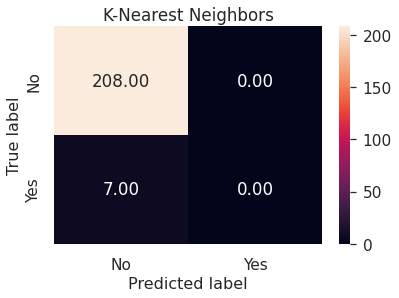

In [974]:
heatmap(cm_h[0], "K-Nearest Neighbors")

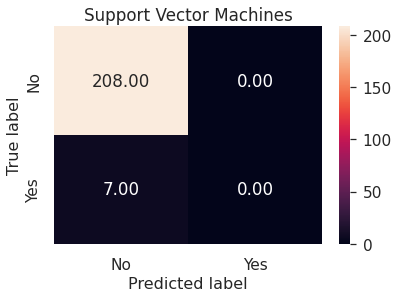

In [975]:
heatmap(cm_h[1], "Support Vector Machines")

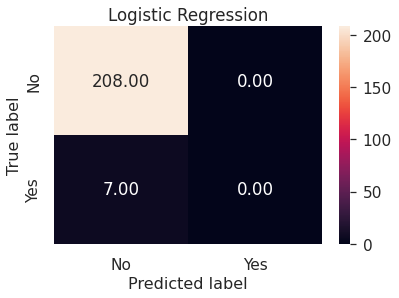

In [976]:
heatmap(cm_h[2], "Logistic Regression")

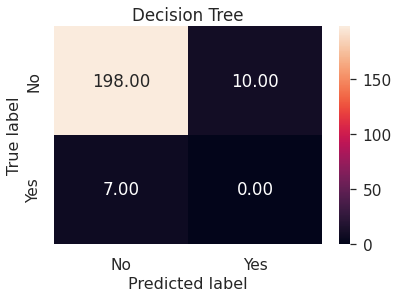

In [977]:
heatmap(cm_h[3], "Decision Tree")

In [978]:
# confusion matrix on target "Schiller"

cm_s = confusion_matrix(X_train_s_selected, X_test_s_selected, y_train_s, y_test_s)

k-Nearest Neighbor: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       197
           1       0.00      0.00      0.00        18

    accuracy                           0.90       215
   macro avg       0.46      0.49      0.47       215
weighted avg       0.84      0.90      0.87       215

0.8976744186046511
Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       197
           1       0.00      0.00      0.00        18

    accuracy                           0.90       215
   macro avg       0.46      0.49      0.47       215
weighted avg       0.84      0.90      0.87       215

0.9023255813953488
Logistic Regression: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       197
           1       0.00      0.00      0.00        18

    accuracy                           0.92       215
   macro avg       0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


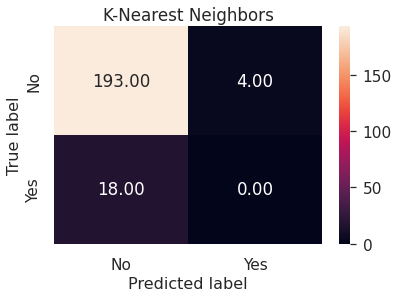

In [979]:
heatmap(cm_s[0], "K-Nearest Neighbors")

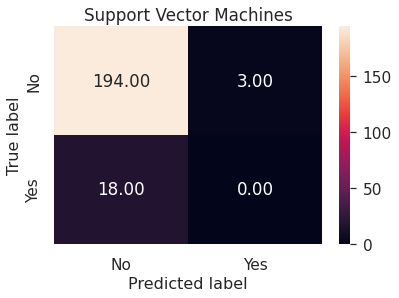

In [980]:
heatmap(cm_s[1], "Support Vector Machines")

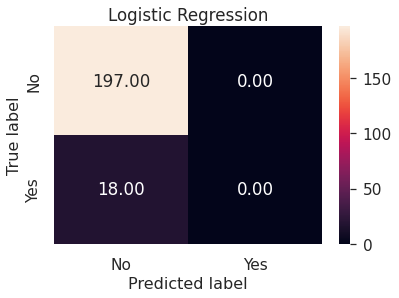

In [981]:
heatmap(cm_s[2], "Logistic Regression")

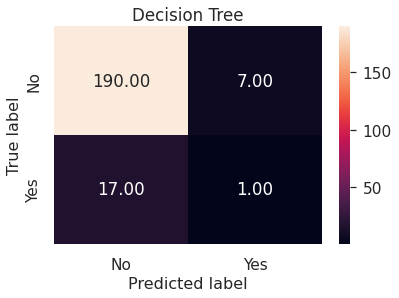

In [982]:
heatmap(cm_s[3], "Decision Tree")

In [983]:
# confusion matrix on target "Citology"
cm_c = confusion_matrix(X_train_c_selected, X_test_c_selected, y_train_c, y_test_c)

k-Nearest Neighbor: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       205
           1       0.00      0.00      0.00        10

    accuracy                           0.94       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.91      0.94      0.93       215

0.9441860465116279
Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       205
           1       0.00      0.00      0.00        10

    accuracy                           0.95       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.91      0.95      0.93       215

0.9534883720930233
Logistic Regression: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       205
           1       0.00      0.00      0.00        10

    accuracy                           0.95       215
   macro avg       0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

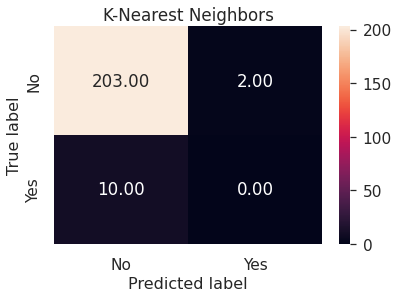

In [984]:
heatmap(cm_c[0], "K-Nearest Neighbors")

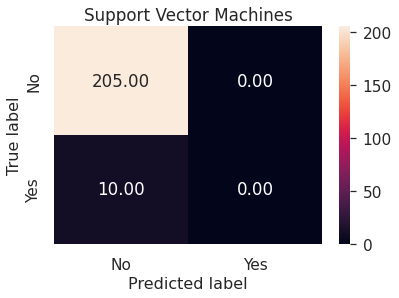

In [985]:
heatmap(cm_c[1], "Support Vector Machines")

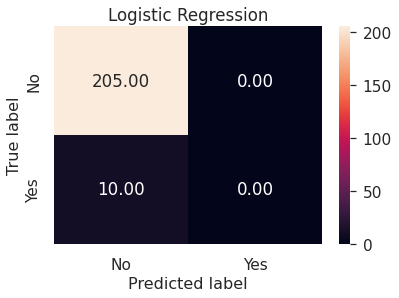

In [986]:
heatmap(cm_c[2], "Logistic Regression")

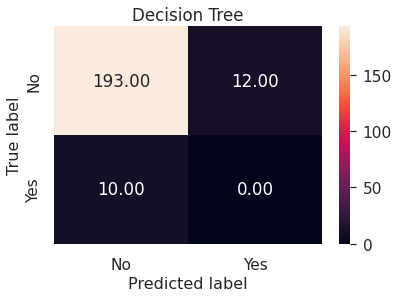

In [987]:
heatmap(cm_c[3], "Decision Tree")

In [988]:
# confusion matrix on target "Biopsy"
cm_b = confusion_matrix(X_train_b_selected, X_test_b_selected, y_train_b, y_test_b)

k-Nearest Neighbor: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       201
           1       0.00      0.00      0.00        14

    accuracy                           0.92       215
   macro avg       0.47      0.49      0.48       215
weighted avg       0.87      0.92      0.90       215

0.9209302325581395
Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       201
           1       0.00      0.00      0.00        14

    accuracy                           0.93       215
   macro avg       0.47      0.50      0.48       215
weighted avg       0.87      0.93      0.90       215

0.9348837209302325
Logistic Regression: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       201
           1       0.00      0.00      0.00        14

    accuracy                           0.93       215
   macro avg       0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

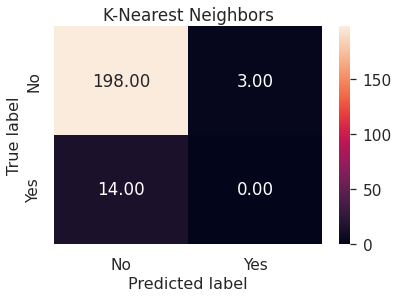

In [989]:
heatmap(cm_b[0], "K-Nearest Neighbors")

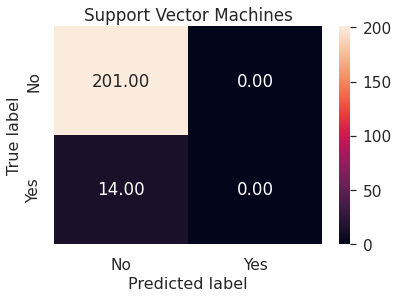

In [990]:
heatmap(cm_b[1], "Support Vector Machines")

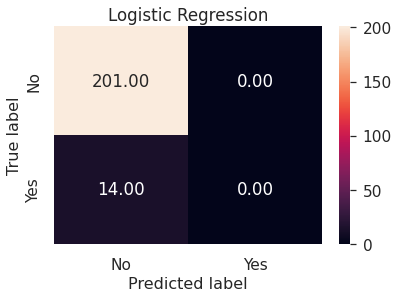

In [991]:
heatmap(cm_b[2], "Logistic Regression")

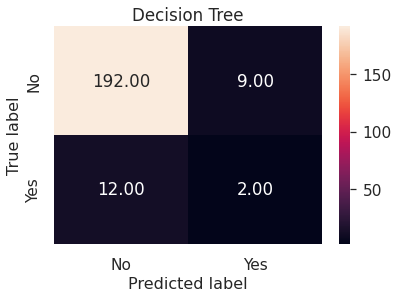

In [992]:
heatmap(cm_b[3], "Decision Tree")

### 3.5. Model Optimization

In [993]:
#optimize the LogisticRegression algorithm
param_grid = {'C':[.001, .01, .1, 1, 10, 100]}
def grid_search_lr(target, xtrain, xtest, ytrain, ytest):
    
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    
    grid_search.fit(X=xtrain, y=ytrain)
    
    print("Best parameters: ", grid_search.best_params_)
    print("Training set score with best parameters", grid_search.best_score_)
    print("Test set score with best parameters:", grid_search.score(xtest, ytest))
    

In [994]:
grid_search_lr(hinselmann, X_train_h_selected, X_test_h_selected, y_train_h, y_test_h)

Best parameters:  {'C': 0.001}
Training set score with best parameters 0.9564680232558139
Test set score with best parameters: 0.9674418604651163


In [995]:
grid_search_lr(schiller, X_train_s_selected, X_test_s_selected, y_train_s, y_test_s)

Best parameters:  {'C': 0.001}
Training set score with best parameters 0.9129118217054263
Test set score with best parameters: 0.9162790697674419


In [996]:
grid_search_lr(citology, X_train_c_selected, X_test_c_selected, y_train_c, y_test_c)

Best parameters:  {'C': 0.001}
Training set score with best parameters 0.9471293604651162
Test set score with best parameters: 0.9534883720930233


In [997]:
grid_search_lr(biopsy, X_train_b_selected, X_test_b_selected, y_train_b, y_test_b)

Best parameters:  {'C': 0.001}
Training set score with best parameters 0.9362403100775193
Test set score with best parameters: 0.9348837209302325


In [998]:
#optimize the DecisionTree algorithm
param_grid = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_split':[2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4]}
def grid_search_dt(target, xtrain, xtest, ytrain, ytest):
    
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    
    grid_search.fit(X=xtrain, y=ytrain)
    
    print("Best parameters: ", grid_search.best_params_)
    print("Training set score with best parameters", grid_search.best_score_)
    print("Test set score with best parameters:", grid_search.score(xtest, ytest))

In [999]:
grid_search_dt(hinselmann, X_train_h_selected, X_test_h_selected, y_train_h, y_test_h)

Best parameters:  {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training set score with best parameters 0.9564680232558139
Test set score with best parameters: 0.9674418604651163


In [1000]:
grid_search_dt(schiller, X_train_s_selected, X_test_s_selected, y_train_s, y_test_s)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
Training set score with best parameters 0.9128875968992247
Test set score with best parameters: 0.9069767441860465


In [1001]:
grid_search_dt(citology, X_train_c_selected, X_test_c_selected, y_train_c, y_test_c)

Best parameters:  {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training set score with best parameters 0.9471293604651162
Test set score with best parameters: 0.9534883720930233


In [1002]:
grid_search_dt(biopsy, X_train_b_selected, X_test_b_selected, y_train_b, y_test_b)

Best parameters:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training set score with best parameters 0.9378028100775193
Test set score with best parameters: 0.9255813953488372


### 3.6. Model Testing

In [1003]:
#define estimators to be Logistic Regression and Decision Tree algorithm
estimators = {"Logistic Regression" : LogisticRegression(C = .001), "Decision Tree" : DecisionTreeClassifier(max_depth=1, min_samples_leaf=1, min_samples_split=2)}
#results for tuned Logistic Regression and Decision Tree Algorithm
#test with selected features
print('With Selected Features')
apply_algorithms("Hinselmann", "Selected", X_train_h_selected, X_test_h_selected, y_train_h, y_test_h)
apply_algorithms("Schiller", "Selected", X_train_s_selected, X_test_s_selected, y_train_s, y_test_h)
apply_algorithms("Citology", "Selected", X_train_c_selected, X_test_c_selected, y_train_c, y_test_c)
apply_algorithms("Biopsy", "Selected", X_train_b_selected, X_test_b_selected, y_train_b, y_test_b)

With Selected Features
Hinselmann
Logistic Regression: 
	Prediction accuracy on the test data: 96.74%

	F1 Score: 0.983451536643026

Hinselmann
Decision Tree: 
	Prediction accuracy on the test data: 96.74%

	F1 Score: 0.983451536643026

Schiller
Logistic Regression: 
	Prediction accuracy on the test data: 96.74%

	F1 Score: 0.983451536643026

Schiller
Decision Tree: 
	Prediction accuracy on the test data: 96.74%

	F1 Score: 0.983451536643026

Citology
Logistic Regression: 
	Prediction accuracy on the test data: 95.35%

	F1 Score: 0.9761904761904763

Citology
Decision Tree: 
	Prediction accuracy on the test data: 95.35%

	F1 Score: 0.9761904761904763

Biopsy
Logistic Regression: 
	Prediction accuracy on the test data: 93.49%

	F1 Score: 0.9663461538461539

Biopsy
Decision Tree: 
	Prediction accuracy on the test data: 93.49%

	F1 Score: 0.9663461538461539



In [1004]:
# confusion matrix on target "Hinselmann"
cm_h = confusion_matrix(X_train_h_selected, X_test_h_selected, y_train_h, y_test_h)

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.97       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.97      0.95       215

0.9674418604651163
Decision Tree: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       208
           1       0.00      0.00      0.00         7

    accuracy                           0.97       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.94      0.97      0.95       215

0.9674418604651163


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

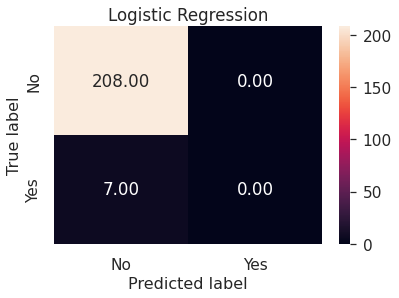

In [1005]:
heatmap(cm_h[0], "Logistic Regression")

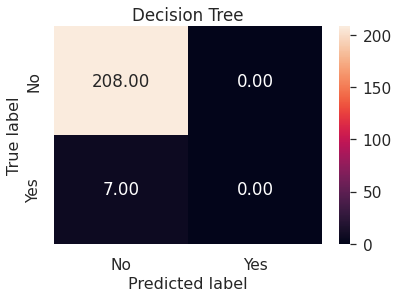

In [1006]:
heatmap(cm_h[1], "Decision Tree")

In [1007]:
# confusion matrix on target "Schiller"
cm_s = confusion_matrix(X_train_s_selected, X_test_s_selected, y_train_s, y_test_s)

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       197
           1       0.00      0.00      0.00        18

    accuracy                           0.92       215
   macro avg       0.46      0.50      0.48       215
weighted avg       0.84      0.92      0.88       215

0.9162790697674419
Decision Tree: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       197
           1       0.00      0.00      0.00        18

    accuracy                           0.92       215
   macro avg       0.46      0.50      0.48       215
weighted avg       0.84      0.92      0.88       215

0.9162790697674419


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

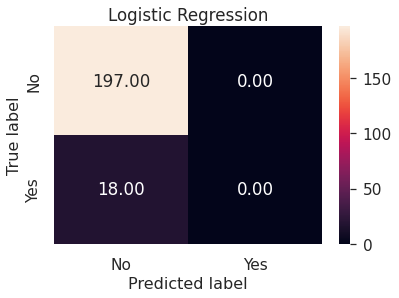

In [1008]:
heatmap(cm_s[0], "Logistic Regression")

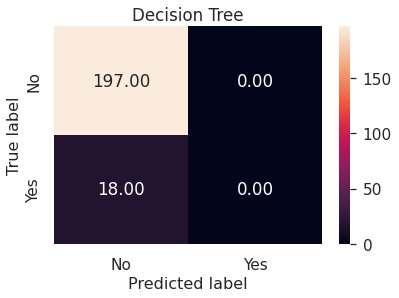

In [1009]:
heatmap(cm_s[1], "Decision Tree")

In [1010]:
# confusion matrix on target "Citology"
cm_c = confusion_matrix(X_train_c_selected, X_test_c_selected, y_train_c, y_test_c)

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       205
           1       0.00      0.00      0.00        10

    accuracy                           0.95       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.91      0.95      0.93       215

0.9534883720930233
Decision Tree: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       205
           1       0.00      0.00      0.00        10

    accuracy                           0.95       215
   macro avg       0.48      0.50      0.49       215
weighted avg       0.91      0.95      0.93       215

0.9534883720930233


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

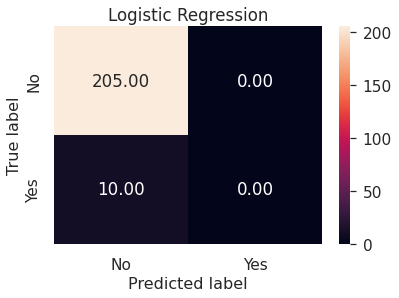

In [1011]:
heatmap(cm_c[0], "Logistic Regression")

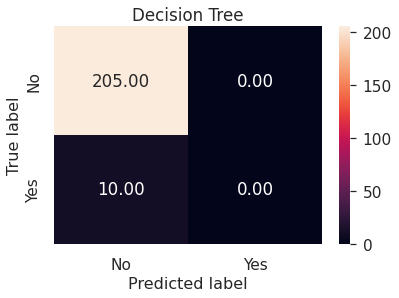

In [1012]:
heatmap(cm_c[1], "Decision Tree")

In [1013]:
# confusion matrix on target "Biopsy"
cm_b = confusion_matrix(X_train_b_selected, X_test_b_selected, y_train_b, y_test_b)

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       201
           1       0.00      0.00      0.00        14

    accuracy                           0.93       215
   macro avg       0.47      0.50      0.48       215
weighted avg       0.87      0.93      0.90       215

0.9348837209302325
Decision Tree: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       201
           1       0.00      0.00      0.00        14

    accuracy                           0.93       215
   macro avg       0.47      0.50      0.48       215
weighted avg       0.87      0.93      0.90       215

0.9348837209302325


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

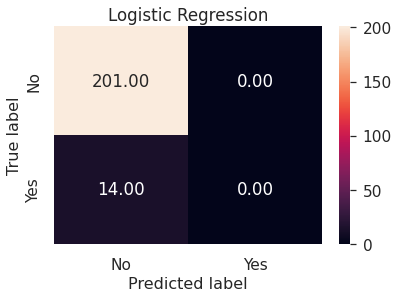

In [1014]:
heatmap(cm_b[0], "Logistic Regression")

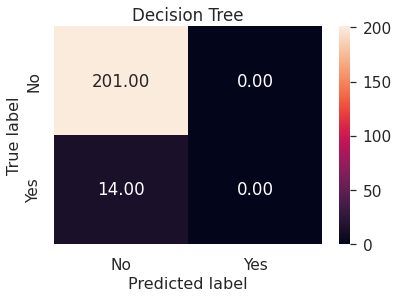

In [1015]:
heatmap(cm_b[1], "Decision Tree")

In [1016]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [1017]:
selected_data

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,0,0,0,0,0,0,0
1,15,1.0,14.0,0,0,0,0,0,0,0
2,34,1.0,17.0,0,0,0,0,0,0,0
3,52,5.0,16.0,1,1,0,0,0,0,0
4,46,3.0,21.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0,0,0,0,0,0,0
854,32,2.0,19.0,0,0,0,0,0,0,0
855,25,2.0,17.0,0,0,0,0,0,1,0
856,33,2.0,24.0,0,0,0,0,0,0,0


In [1018]:
selected_data.to_csv('selected_data.csv')

In [1019]:
data = pd.read_csv('selected_data.csv')
data

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15.0,0,0,0,0,0,0,0
1,1,15,1.0,14.0,0,0,0,0,0,0,0
2,2,34,1.0,17.0,0,0,0,0,0,0,0
3,3,52,5.0,16.0,1,1,0,0,0,0,0
4,4,46,3.0,21.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
853,853,34,3.0,18.0,0,0,0,0,0,0,0
854,854,32,2.0,19.0,0,0,0,0,0,0,0
855,855,25,2.0,17.0,0,0,0,0,0,1,0
856,856,33,2.0,24.0,0,0,0,0,0,0,0


In [1020]:
data.drop(data.columns[[0]], axis = 1, inplace = True)

In [1021]:
data

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,0,0,0,0,0,0,0
1,15,1.0,14.0,0,0,0,0,0,0,0
2,34,1.0,17.0,0,0,0,0,0,0,0
3,52,5.0,16.0,1,1,0,0,0,0,0
4,46,3.0,21.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0,0,0,0,0,0,0
854,32,2.0,19.0,0,0,0,0,0,0,0
855,25,2.0,17.0,0,0,0,0,0,1,0
856,33,2.0,24.0,0,0,0,0,0,0,0


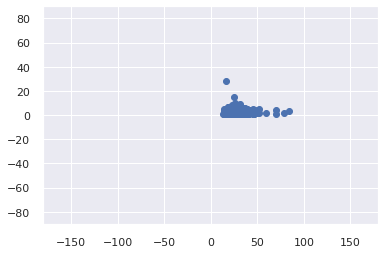

In [1022]:
import matplotlib.pyplot as plt
plt.scatter(data['Age'], data['Number of sexual partners'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [1023]:
x = data.iloc[:,0:1] # 1t for rows and second for columns
x 

,Age
0,18
1,15
2,34
3,52
4,46
...,...
853,34
854,32
855,25
856,33


In [1024]:
kmeans = KMeans(4, random_state=8)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=8)

In [1025]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [1026]:
from collections import Counter
print(Counter(identified_clusters))

Counter({1: 354, 0: 299, 2: 200, 3: 5})


In [1027]:
print(Counter(identified_clusters==0))

Counter({False: 559, True: 299})


In [1028]:
identified_clusters==0

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [1029]:
print(Counter(identified_clusters==1))

Counter({False: 504, True: 354})


In [1030]:
identified_clusters==1

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [1031]:
print(Counter(identified_clusters==2))

Counter({False: 658, True: 200})


In [1032]:
identified_clusters==2

array([False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [1033]:
print(Counter(identified_clusters==3))

Counter({False: 853, True: 5})


In [1034]:
identified_clusters==3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [1035]:
data['cluster'] = identified_clusters
data

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cluster
0,18,4.0,15.0,0,0,0,0,0,0,0,1
1,15,1.0,14.0,0,0,0,0,0,0,0,1
2,34,1.0,17.0,0,0,0,0,0,0,0,2
3,52,5.0,16.0,1,1,0,0,0,0,0,2
4,46,3.0,21.0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0,0,0,0,0,0,0,2
854,32,2.0,19.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0,0,0,0,0,1,0,0
856,33,2.0,24.0,0,0,0,0,0,0,0,2


In [1036]:
data.groupby('cluster').mean()

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
cluster,,,,,,,,,,
0,27.578595,2.792642,17.321070,0.026756,0.023411,0.040134,0.036789,0.066890,0.046823,0.053512
1,19.392655,2.262712,15.855932,0.005650,0.008475,0.011299,0.042373,0.070621,0.053672,0.056497
2,37.695000,2.665000,18.490000,0.040000,0.040000,0.035000,0.045000,0.140000,0.055000,0.095000
3,72.400000,2.400000,18.400000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000


Text(0.5, 0, 'CLUSTERS')

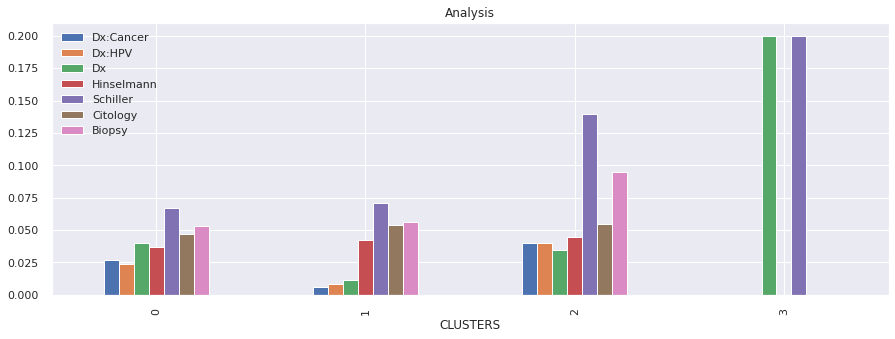

In [1037]:
# (data[['Age',	'Number of sexual partners', 'First sexual intercourse', 'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'cluster']]
#  .groupby('cluster').mean().plot.bar(figsize=(15, 5)))
(data[['Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'cluster']]
 .groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Analysis')
plt.xlabel('CLUSTERS')

In [1038]:
cluster1 = data[data['cluster']==0]
cluster1

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cluster
7,26,1.0,26.0,0,0,0,0,0,0,0,0
11,27,1.0,17.0,0,0,0,0,0,0,0,0
81,31,3.0,15.0,0,0,0,0,0,0,0,0
82,32,2.0,18.0,0,0,0,0,0,0,0,0
83,32,3.0,18.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
848,31,3.0,18.0,0,0,0,0,0,0,0,0
849,32,3.0,18.0,1,1,0,0,0,0,0,0
854,32,2.0,19.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0,0,0,0,0,1,0,0


In [1039]:
cluster1.mean()

Age                          27.578595
Number of sexual partners     2.792642
First sexual intercourse     17.321070
Dx:Cancer                     0.026756
Dx:HPV                        0.023411
Dx                            0.040134
Hinselmann                    0.036789
Schiller                      0.066890
Citology                      0.046823
Biopsy                        0.053512
cluster                       0.000000
dtype: float64

In [1040]:
cluster1.to_csv('cluster1.csv')

In [1041]:
cluster2 = data[data['cluster']==1]
cluster2

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cluster
0,18,4.0,15.0,0,0,0,0,0,0,0,1
1,15,1.0,14.0,0,0,0,0,0,0,0,1
113,23,5.0,23.0,0,0,0,0,0,0,0,1
141,20,3.0,18.0,0,0,0,0,0,0,0,1
169,18,3.0,18.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
819,14,1.0,14.0,0,0,0,0,0,0,0,1
841,23,2.0,15.0,0,0,0,0,0,0,0,1
845,19,2.0,15.0,0,0,0,0,0,0,0,1
850,19,1.0,14.0,0,0,0,0,0,0,0,1


In [1042]:
cluster2.to_csv('cluster2.csv')

In [1043]:
cluster3 = data[data['cluster']==2]
cluster3

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cluster
2,34,1.0,17.0,0,0,0,0,0,0,0,2
3,52,5.0,16.0,1,1,0,0,0,0,0,2
4,46,3.0,21.0,0,0,0,0,0,0,0,2
5,42,3.0,23.0,0,0,0,0,0,0,0,2
6,51,3.0,17.0,0,0,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
842,36,3.0,16.0,0,0,0,0,0,0,0,2
846,35,2.0,17.0,0,0,0,0,0,0,0,2
852,43,3.0,17.0,0,0,0,0,0,0,0,2
853,34,3.0,18.0,0,0,0,0,0,0,0,2


In [1044]:
cluster3.to_csv('cluster3.csv')

In [1045]:
cluster4 = data[data['cluster']==3]
cluster4

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cluster
652,59,2.0,13.0,0,0,1,0,0,0,0,3
667,79,2.0,16.0,0,0,0,0,0,0,0,3
668,84,3.0,20.0,0,0,0,0,1,0,0,3
676,70,4.0,27.0,0,0,0,0,0,0,0,3
682,70,1.0,16.0,0,0,0,0,0,0,0,3


In [1046]:
cluster4.to_csv('cluster4.csv')

## ***CLUSTER 1***

In [1047]:
cluster1 = read_data("cluster1.csv")
cluster1

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cluster
0,7,26,1.0,26.0,0,0,0,0,0,0,0,0
1,11,27,1.0,17.0,0,0,0,0,0,0,0,0
2,81,31,3.0,15.0,0,0,0,0,0,0,0,0
3,82,32,2.0,18.0,0,0,0,0,0,0,0,0
4,83,32,3.0,18.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,848,31,3.0,18.0,0,0,0,0,0,0,0,0
295,849,32,3.0,18.0,1,1,0,0,0,0,0,0
296,854,32,2.0,19.0,0,0,0,0,0,0,0,0
297,855,25,2.0,17.0,0,0,0,0,0,1,0,0


In [1048]:
cluster1.drop(cluster1.columns[[0]], axis = 1, inplace = True)

In [1049]:
cluster1.drop(['cluster'], axis = 1, inplace = True)

In [1050]:
cluster1

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,26,1.0,26.0,0,0,0,0,0,0,0
1,27,1.0,17.0,0,0,0,0,0,0,0
2,31,3.0,15.0,0,0,0,0,0,0,0
3,32,2.0,18.0,0,0,0,0,0,0,0
4,32,3.0,18.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
294,31,3.0,18.0,0,0,0,0,0,0,0
295,32,3.0,18.0,1,1,0,0,0,0,0
296,32,2.0,19.0,0,0,0,0,0,0,0
297,25,2.0,17.0,0,0,0,0,0,1,0


In [1051]:
cluster1.describe(include = "all")

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,27.578595,2.792642,17.321070,0.026756,0.023411,0.040134,0.036789,0.06689,0.046823,0.053512
std,2.465128,1.647801,2.546993,0.161640,0.151460,0.196602,0.188560,0.25025,0.211613,0.225429
min,24.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,25.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,28.000000,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,30.000000,3.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,32.000000,15.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [1052]:
#the risk factors are the features we are going to analyze
features = (cluster1.iloc[0:299, 0:30])

#the four diagnoses are the target variables
hinselmann = cluster1["Hinselmann"]
schiller = cluster1["Schiller"]
citology = cluster1["Citology"]
biopsy = cluster1["Biopsy"]

In [1053]:
#define a dictionary of estimators for model
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Support Vector Machine': LinearSVC(max_iter=1000000),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()}

In [1054]:
#function that splits the data using percentage split (75% train 25% test)
def split_data(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)
    return X_train, X_test, y_train, y_test

In [1055]:
#split the data using percentage split
X_train_h, X_test_h, y_train_h, y_test_h = split_data(features, hinselmann)
X_train_s, X_test_s, y_train_s, y_test_s = split_data(features, schiller)
X_train_c, X_test_c, y_train_c, y_test_c = split_data(features, citology)
X_train_b, X_test_b, y_train_b, y_test_b = split_data(features, biopsy)

In [1056]:
# preprocess using MinMaxScaler
def preprocessor(train, test):
    scaler = MinMaxScaler().fit(train)
    
    #scale testing and training sets
    X_train_scaled = scaler.transform(train)
    X_test_scaled = scaler.transform(test)

    return X_train_scaled, X_test_scaled

In [1057]:
#preprocess the data
X_train_h_scaled, X_test_h_scaled = preprocessor(X_train_h, X_test_h)
X_train_s_scaled, X_test_s_scaled = preprocessor(X_train_s, X_test_s)
X_train_c_scaled, X_test_c_scaled = preprocessor(X_train_c, X_test_c)
X_train_b_scaled, X_test_b_scaled = preprocessor(X_train_b, X_test_b)

In [1058]:
#define dictionary of feature selection methods
feat_select_dict = {"UNI" : SelectKBest(score_func=f_classif, k = 3),
                    "MB" : SelectFromModel(DecisionTreeRegressor(random_state = 3000)),
                   "RFE" : RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)}

In [1059]:
#set up dataframes to hold results of selecting features vs using all of the features
prelim_train_results = pd.DataFrame(index = ["Acc_All", "Acc_UNI", "Acc_MB", "Acc_RFE"])
prelim_test_results = pd.DataFrame(index = ["Acc_All", "Acc_UNI", "Acc_MB", "Acc_RFE"])

In [1060]:
#remove columns that are not the selected features
def select_features_in_data(x, features, columns_list):
    x_selected = pd.DataFrame(x, columns = features)
    return x_selected

In [1061]:
X_train_h_selected = select_features_in_data(X_train_h_scaled, list(features.columns), features_list)
X_test_h_selected = select_features_in_data(X_test_h_scaled, list(features.columns), features_list)
X_train_s_selected = select_features_in_data(X_train_s_scaled, list(features.columns), features_list)
X_test_s_selected = select_features_in_data(X_test_s_scaled, list(features.columns), features_list)
X_train_c_selected = select_features_in_data(X_train_c_scaled, list(features.columns), features_list)
X_test_c_selected = select_features_in_data(X_test_c_scaled, list(features.columns), features_list)
X_train_b_selected = select_features_in_data(X_train_b_scaled, list(features.columns), features_list)
X_test_b_selected = select_features_in_data(X_test_b_scaled, list(features.columns), features_list)

In [1062]:
#CLEANING: clean up strings so they can used as numbers
for columns in cluster1:
    cluster1[columns] = pd.to_numeric(cluster1[columns])

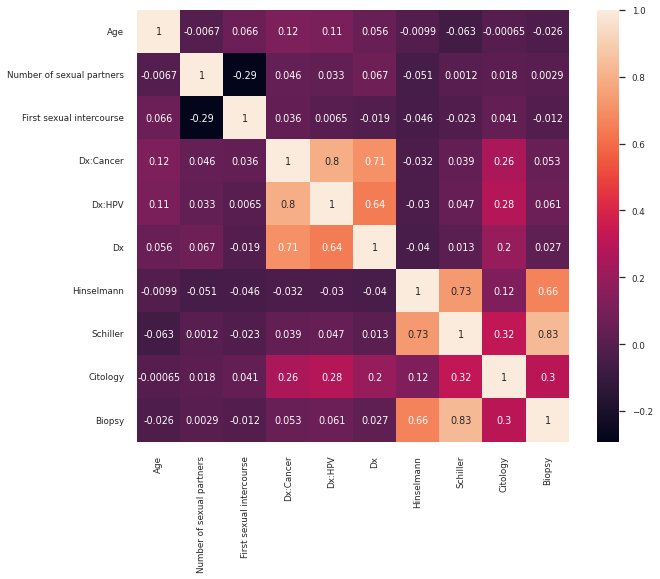

In [1063]:
# generate the heatmap to visualize the correlation between each variable

# heatmap showing correlations between all variables
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(cluster1.corr(), square=True, annot=True)
plt.subplots_adjust(bottom=0.28)
plt.show()

In [1064]:
cluster1_selected_data = cluster1
cluster1_selected_data

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,26,1.0,26.0,0,0,0,0,0,0,0
1,27,1.0,17.0,0,0,0,0,0,0,0
2,31,3.0,15.0,0,0,0,0,0,0,0
3,32,2.0,18.0,0,0,0,0,0,0,0
4,32,3.0,18.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
294,31,3.0,18.0,0,0,0,0,0,0,0
295,32,3.0,18.0,1,1,0,0,0,0,0
296,32,2.0,19.0,0,0,0,0,0,0,0
297,25,2.0,17.0,0,0,0,0,0,1,0


In [1065]:
cluster1_selected_data_accuracy = pd.DataFrame(index=["Accuracy-Selected", "Accuracy-All"])
cluster1_selected_data_f1 = pd.DataFrame(index=["F1 Score-Selected", "F1 Score-All"])

In [1066]:
#function that applies the algorithms to the data
def apply_algorithms(target, features, x_train, x_test, ytrain, ytest):
    for estimator_name, estimator_object in estimators.items():
        #fit scaled sets to model
        estimator_object.fit(X=x_train, y=ytrain)
        #make predictions on the test set
        predicted = estimator_object.predict(X=x_test)
        expected = ytest
        #display classification metric results
        accuracy = estimator_object.score(x_test, ytest)
        f1score = f1_score(y_true=expected, y_pred=predicted, average=None)[0]
        cluster1_selected_data_accuracy.loc["Accuracy-" + features, target + ": " + estimator_name] = accuracy
        cluster1_selected_data_f1.loc["F1 Score-" + features, target + ": " + estimator_name] = f1score
        print(target)
        print(estimator_name + ": \n\t" + "Prediction accuracy on the test data:", f"{accuracy:.2%}" + "\n")
        print("\tF1 Score: " + str(f1score) + "\n")

In [1067]:
#results
print('TEST RESULTS WHEN ONLY SELECTED FEATURES USED:')
print('___________________________________________\n')
print('With Selected Features')
apply_algorithms("Hinselmann", "Selected", X_train_h_selected, X_test_h_selected, y_train_h, y_test_h)
apply_algorithms("Schiller", "Selected", X_train_s_selected, X_test_s_selected, y_train_s, y_test_s)
apply_algorithms("Citology", "Selected", X_train_c_selected, X_test_c_selected, y_train_c, y_test_c)
apply_algorithms("Biopsy", "Selected", X_train_b_selected, X_test_b_selected, y_train_b, y_test_b)
print('\nTEST RESULTS WHEN ALL FEATURES USED:')
print('____________________________________\n')
print('With All Features')
apply_algorithms("Hinselmann", "All", X_train_h_scaled, X_test_h_scaled, y_train_h, y_test_h)
apply_algorithms("Schiller", "All", X_train_s_scaled, X_test_s_scaled, y_train_s, y_test_s)
apply_algorithms("Citology", "All", X_train_c_scaled, X_test_c_scaled, y_train_c, y_test_c)
apply_algorithms("Biopsy", "All", X_train_b_scaled, X_test_b_scaled, y_train_b, y_test_b)

TEST RESULTS WHEN ONLY SELECTED FEATURES USED:
___________________________________________

With Selected Features
Hinselmann
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Hinselmann
Support Vector Machine: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Hinselmann
Logistic Regression: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Hinselmann
Decision Tree: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 98.67%

	F1 Score: 0.9929078014184397

Schiller
Support Vector Machine: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
Logistic Regression: 
	Prediction accuracy on the test data: 98.67%

	F1 Score: 0.9929078014184397

Schiller
Decision Tree: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Citology
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 98.67%

	F1 Score: 0.9930069

In [1068]:
cluster1_selected_data_accuracy

,Hinselmann: k-Nearest Neighbor,Hinselmann: Support Vector Machine,Hinselmann: Logistic Regression,Hinselmann: Decision Tree,Schiller: k-Nearest Neighbor,Schiller: Support Vector Machine,Schiller: Logistic Regression,Schiller: Decision Tree,Citology: k-Nearest Neighbor,Citology: Support Vector Machine,Citology: Logistic Regression,Citology: Decision Tree,Biopsy: k-Nearest Neighbor,Biopsy: Support Vector Machine,Biopsy: Logistic Regression,Biopsy: Decision Tree
Accuracy-Selected,1.0,1.0,1.0,1.0,0.986667,1.0,0.986667,1.0,0.986667,1.0,0.96,1.0,0.986667,1.0,0.986667,1.0
Accuracy-All,1.0,1.0,1.0,1.0,0.986667,1.0,0.986667,1.0,0.986667,1.0,0.96,1.0,0.986667,1.0,0.986667,1.0


In [1069]:
cluster1_selected_data_accuracy.mean(axis = 1)

Accuracy-Selected    0.993333
Accuracy-All         0.993333
dtype: float64

In [1070]:
#Calculate average by algorithm
def calc_avg_for_algorithms(df, algorithm):
    list = [column for column in df.columns.tolist() if algorithm in column]
    return pd.DataFrame(data = df[list]).mean(axis = 1)

In [1071]:
average_accuracies = {"KNN" : calc_avg_for_algorithms(cluster1_selected_data_accuracy, "Neighbor"),
            "SVM": calc_avg_for_algorithms(cluster1_selected_data_accuracy, "Support"),
            "Logistic Regression": calc_avg_for_algorithms(cluster1_selected_data_accuracy, "Logistic"),
            "Decision Tree": calc_avg_for_algorithms(cluster1_selected_data_accuracy, "Decision Tree")}

In [1072]:
pd.DataFrame(average_accuracies)

,KNN,SVM,Logistic Regression,Decision Tree
Accuracy-Selected,0.99,1.0,0.983333,1.0
Accuracy-All,0.99,1.0,0.983333,1.0


In [1073]:
cluster1_selected_data_f1

,Hinselmann: k-Nearest Neighbor,Hinselmann: Support Vector Machine,Hinselmann: Logistic Regression,Hinselmann: Decision Tree,Schiller: k-Nearest Neighbor,Schiller: Support Vector Machine,Schiller: Logistic Regression,Schiller: Decision Tree,Citology: k-Nearest Neighbor,Citology: Support Vector Machine,Citology: Logistic Regression,Citology: Decision Tree,Biopsy: k-Nearest Neighbor,Biopsy: Support Vector Machine,Biopsy: Logistic Regression,Biopsy: Decision Tree
F1 Score-Selected,1.0,1.0,1.0,1.0,0.992908,1.0,0.992908,1.0,0.993007,1.0,0.97931,1.0,0.992908,1.0,0.992908,1.0
F1 Score-All,1.0,1.0,1.0,1.0,0.992908,1.0,0.992908,1.0,0.993007,1.0,0.97931,1.0,0.992908,1.0,0.992908,1.0


In [1074]:
cluster1_selected_data_f1.mean(axis = 1)

F1 Score-Selected    0.996497
F1 Score-All         0.996497
dtype: float64

In [1075]:
average_f1s = {"KNN" : calc_avg_for_algorithms(cluster1_selected_data_f1, "Neighbor"),
            "SVM": calc_avg_for_algorithms(cluster1_selected_data_f1, "Support"),
            "Logistic Regression": calc_avg_for_algorithms(cluster1_selected_data_f1, "Logistic"),
            "Decision Tree": calc_avg_for_algorithms(cluster1_selected_data_f1, "Decision Tree")}

In [1076]:
#display dataframe of average f1 scores by algorithm
pd.DataFrame(average_f1s)

,KNN,SVM,Logistic Regression,Decision Tree
F1 Score-Selected,0.994706,1.0,0.991281,1.0
F1 Score-All,0.994706,1.0,0.991281,1.0


Text(0.5, 0, 'CLUSTERS')

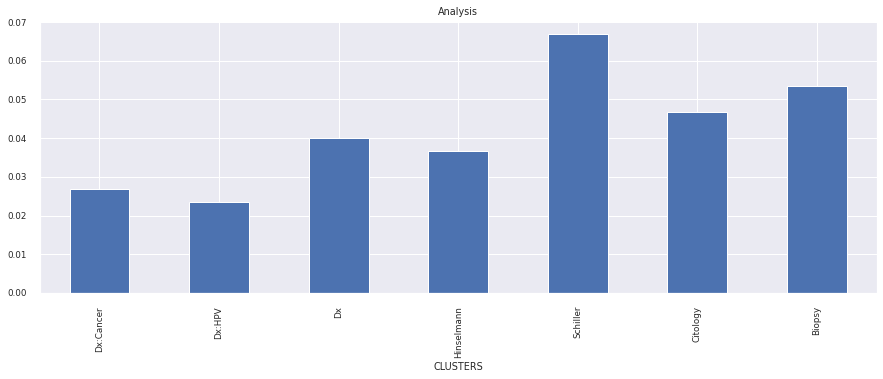

In [1077]:
# (cluster1[['Age',	'Number of sexual partners', 'First sexual intercourse', 'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
#  .mean().plot.bar(figsize=(15, 5)))
(cluster1[['Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
 .mean().plot.bar(figsize=(15, 5)))
plt.title('Analysis')
plt.xlabel('CLUSTERS')

## ***CLUSTER 2***

In [1078]:
cluster2 = read_data("cluster2.csv")
cluster2

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cluster
0,0,18,4.0,15.0,0,0,0,0,0,0,0,1
1,1,15,1.0,14.0,0,0,0,0,0,0,0,1
2,113,23,5.0,23.0,0,0,0,0,0,0,0,1
3,141,20,3.0,18.0,0,0,0,0,0,0,0,1
4,169,18,3.0,18.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
349,819,14,1.0,14.0,0,0,0,0,0,0,0,1
350,841,23,2.0,15.0,0,0,0,0,0,0,0,1
351,845,19,2.0,15.0,0,0,0,0,0,0,0,1
352,850,19,1.0,14.0,0,0,0,0,0,0,0,1


In [1079]:
cluster2.drop(cluster2.columns[[0]], axis = 1, inplace = True)

In [1080]:
cluster2.drop(['cluster'], axis = 1, inplace = True)

In [1081]:
cluster2

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,0,0,0,0,0,0,0
1,15,1.0,14.0,0,0,0,0,0,0,0
2,23,5.0,23.0,0,0,0,0,0,0,0
3,20,3.0,18.0,0,0,0,0,0,0,0
4,18,3.0,18.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
349,14,1.0,14.0,0,0,0,0,0,0,0
350,23,2.0,15.0,0,0,0,0,0,0,0
351,19,2.0,15.0,0,0,0,0,0,0,0
352,19,1.0,14.0,0,0,0,0,0,0,0


In [1082]:
cluster2.describe(include = "all")

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,19.392655,2.262712,15.855932,0.005650,0.008475,0.011299,0.042373,0.070621,0.053672,0.056497
std,2.497830,1.847261,1.873970,0.075058,0.091796,0.105846,0.201724,0.256554,0.225689,0.231206
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,28.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1083]:
#the risk factors are the features we are going to analyze
features = (cluster2.iloc[0:354, 0:30])

#the four diagnoses are the target variables
hinselmann = cluster2["Hinselmann"]
schiller = cluster2["Schiller"]
citology = cluster2["Citology"]
biopsy = cluster2["Biopsy"]

In [1084]:
#define a dictionary of estimators for model
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Support Vector Machine': LinearSVC(max_iter=1000000),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()}

In [1085]:
#function that splits the data using percentage split (75% train 25% test)
def split_data(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)
    return X_train, X_test, y_train, y_test

In [1086]:
#split the data using percentage split
X_train_h, X_test_h, y_train_h, y_test_h = split_data(features, hinselmann)
X_train_s, X_test_s, y_train_s, y_test_s = split_data(features, schiller)
X_train_c, X_test_c, y_train_c, y_test_c = split_data(features, citology)
X_train_b, X_test_b, y_train_b, y_test_b = split_data(features, biopsy)

In [1087]:
# preprocess using MinMaxScaler
def preprocessor(train, test):
    scaler = MinMaxScaler().fit(train)
    
    #scale testing and training sets
    X_train_scaled = scaler.transform(train)
    X_test_scaled = scaler.transform(test)

    return X_train_scaled, X_test_scaled

In [1088]:
#preprocess the data
X_train_h_scaled, X_test_h_scaled = preprocessor(X_train_h, X_test_h)
X_train_s_scaled, X_test_s_scaled = preprocessor(X_train_s, X_test_s)
X_train_c_scaled, X_test_c_scaled = preprocessor(X_train_c, X_test_c)
X_train_b_scaled, X_test_b_scaled = preprocessor(X_train_b, X_test_b)

In [1089]:
#define dictionary of feature selection methods
feat_select_dict = {"UNI" : SelectKBest(score_func=f_classif, k = 3),
                    "MB" : SelectFromModel(DecisionTreeRegressor(random_state = 3000)),
                   "RFE" : RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)}

In [1090]:
#set up dataframes to hold results of selecting features vs using all of the features
prelim_train_results = pd.DataFrame(index = ["Acc_All", "Acc_UNI", "Acc_MB", "Acc_RFE"])
prelim_test_results = pd.DataFrame(index = ["Acc_All", "Acc_UNI", "Acc_MB", "Acc_RFE"])

In [1091]:
#remove columns that are not the selected features
def select_features_in_data(x, features, columns_list):
    x_selected = pd.DataFrame(x, columns = features)
    return x_selected

In [1092]:
X_train_h_selected = select_features_in_data(X_train_h_scaled, list(features.columns), features_list)
X_test_h_selected = select_features_in_data(X_test_h_scaled, list(features.columns), features_list)
X_train_s_selected = select_features_in_data(X_train_s_scaled, list(features.columns), features_list)
X_test_s_selected = select_features_in_data(X_test_s_scaled, list(features.columns), features_list)
X_train_c_selected = select_features_in_data(X_train_c_scaled, list(features.columns), features_list)
X_test_c_selected = select_features_in_data(X_test_c_scaled, list(features.columns), features_list)
X_train_b_selected = select_features_in_data(X_train_b_scaled, list(features.columns), features_list)
X_test_b_selected = select_features_in_data(X_test_b_scaled, list(features.columns), features_list)

In [1093]:
#CLEANING: clean up strings so they can used as numbers
for columns in cluster2:
    cluster2[columns] = pd.to_numeric(cluster2[columns])

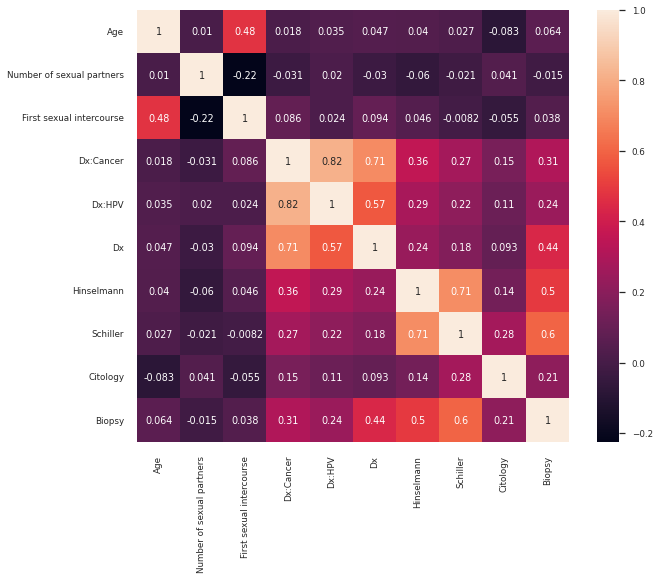

In [1094]:
# generate the heatmap to visualize the correlation between each variable

# heatmap showing correlations between all variables
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(cluster2.corr(), square=True, annot=True)
plt.subplots_adjust(bottom=0.28)
plt.show()

In [1095]:
cluster2_selected_data = cluster2
cluster2_selected_data

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,0,0,0,0,0,0,0
1,15,1.0,14.0,0,0,0,0,0,0,0
2,23,5.0,23.0,0,0,0,0,0,0,0
3,20,3.0,18.0,0,0,0,0,0,0,0
4,18,3.0,18.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
349,14,1.0,14.0,0,0,0,0,0,0,0
350,23,2.0,15.0,0,0,0,0,0,0,0
351,19,2.0,15.0,0,0,0,0,0,0,0
352,19,1.0,14.0,0,0,0,0,0,0,0


In [1096]:
cluster2_selected_data_accuracy = pd.DataFrame(index=["Accuracy-Selected", "Accuracy-All"])
cluster2_selected_data_f1 = pd.DataFrame(index=["F1 Score-Selected", "F1 Score-All"])

In [1097]:
#function that applies the algorithms to the data
def apply_algorithms(target, features, x_train, x_test, ytrain, ytest):
    for estimator_name, estimator_object in estimators.items():
        #fit scaled sets to model
        estimator_object.fit(X=x_train, y=ytrain)
        #make predictions on the test set
        predicted = estimator_object.predict(X=x_test)
        expected = ytest
        #display classification metric results
        accuracy = estimator_object.score(x_test, ytest)
        f1score = f1_score(y_true=expected, y_pred=predicted, average=None)[0]
        cluster2_selected_data_accuracy.loc["Accuracy-" + features, target + ": " + estimator_name] = accuracy
        cluster2_selected_data_f1.loc["F1 Score-" + features, target + ": " + estimator_name] = f1score
        print(target)
        print(estimator_name + ": \n\t" + "Prediction accuracy on the test data:", f"{accuracy:.2%}" + "\n")
        print("\tF1 Score: " + str(f1score) + "\n")

In [1098]:
#results
print('TEST RESULTS WHEN ONLY SELECTED FEATURES USED:')
print('___________________________________________\n')
print('With Selected Features')
apply_algorithms("Hinselmann", "Selected", X_train_h_selected, X_test_h_selected, y_train_h, y_test_h)
apply_algorithms("Schiller", "Selected", X_train_s_selected, X_test_s_selected, y_train_s, y_test_s)
apply_algorithms("Citology", "Selected", X_train_c_selected, X_test_c_selected, y_train_c, y_test_c)
apply_algorithms("Biopsy", "Selected", X_train_b_selected, X_test_b_selected, y_train_b, y_test_b)
print('\nTEST RESULTS WHEN ALL FEATURES USED:')
print('____________________________________\n')
print('With All Features')
apply_algorithms("Hinselmann", "All", X_train_h_scaled, X_test_h_scaled, y_train_h, y_test_h)
apply_algorithms("Schiller", "All", X_train_s_scaled, X_test_s_scaled, y_train_s, y_test_s)
apply_algorithms("Citology", "All", X_train_c_scaled, X_test_c_scaled, y_train_c, y_test_c)
apply_algorithms("Biopsy", "All", X_train_b_scaled, X_test_b_scaled, y_train_b, y_test_b)

TEST RESULTS WHEN ONLY SELECTED FEATURES USED:
___________________________________________

With Selected Features
Hinselmann
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Hinselmann
Support Vector Machine: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Hinselmann
Logistic Regression: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Hinselmann
Decision Tree: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
Support Vector Machine: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
Logistic Regression: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
Decision Tree: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Citology
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 98.88%

	F1 Score: 0.9942196531791908

Citology
Support 

In [1099]:
cluster2_selected_data_accuracy

,Hinselmann: k-Nearest Neighbor,Hinselmann: Support Vector Machine,Hinselmann: Logistic Regression,Hinselmann: Decision Tree,Schiller: k-Nearest Neighbor,Schiller: Support Vector Machine,Schiller: Logistic Regression,Schiller: Decision Tree,Citology: k-Nearest Neighbor,Citology: Support Vector Machine,Citology: Logistic Regression,Citology: Decision Tree,Biopsy: k-Nearest Neighbor,Biopsy: Support Vector Machine,Biopsy: Logistic Regression,Biopsy: Decision Tree
Accuracy-Selected,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.988764,1.0,1.0,1.0,0.977528,1.0,0.977528,1.0
Accuracy-All,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.988764,1.0,1.0,1.0,0.977528,1.0,0.977528,1.0


In [1100]:
cluster2_selected_data_accuracy.mean(axis = 1)

Accuracy-Selected    0.996489
Accuracy-All         0.996489
dtype: float64

In [1101]:
#Calculate average by algorithm
def calc_avg_for_algorithms(df, algorithm):
    list = [column for column in df.columns.tolist() if algorithm in column]
    return pd.DataFrame(data = df[list]).mean(axis = 1)

In [1102]:
average_accuracies = {"KNN" : calc_avg_for_algorithms(cluster2_selected_data_accuracy, "Neighbor"),
            "SVM": calc_avg_for_algorithms(cluster2_selected_data_accuracy, "Support"),
            "Logistic Regression": calc_avg_for_algorithms(cluster2_selected_data_accuracy, "Logistic"),
            "Decision Tree": calc_avg_for_algorithms(cluster2_selected_data_accuracy, "Decision Tree")}

In [1103]:
pd.DataFrame(average_accuracies)

,KNN,SVM,Logistic Regression,Decision Tree
Accuracy-Selected,0.991573,1.0,0.994382,1.0
Accuracy-All,0.991573,1.0,0.994382,1.0


In [1104]:
cluster2_selected_data_f1

,Hinselmann: k-Nearest Neighbor,Hinselmann: Support Vector Machine,Hinselmann: Logistic Regression,Hinselmann: Decision Tree,Schiller: k-Nearest Neighbor,Schiller: Support Vector Machine,Schiller: Logistic Regression,Schiller: Decision Tree,Citology: k-Nearest Neighbor,Citology: Support Vector Machine,Citology: Logistic Regression,Citology: Decision Tree,Biopsy: k-Nearest Neighbor,Biopsy: Support Vector Machine,Biopsy: Logistic Regression,Biopsy: Decision Tree
F1 Score-Selected,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99422,1.0,1.0,1.0,0.988235,1.0,0.988235,1.0
F1 Score-All,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.99422,1.0,1.0,1.0,0.988235,1.0,0.988235,1.0


In [1105]:
cluster2_selected_data_f1.mean(axis = 1)

F1 Score-Selected    0.998168
F1 Score-All         0.998168
dtype: float64

In [1106]:
average_f1s = {"KNN" : calc_avg_for_algorithms(cluster2_selected_data_f1, "Neighbor"),
            "SVM": calc_avg_for_algorithms(cluster2_selected_data_f1, "Support"),
            "Logistic Regression": calc_avg_for_algorithms(cluster2_selected_data_f1, "Logistic"),
            "Decision Tree": calc_avg_for_algorithms(cluster2_selected_data_f1, "Decision Tree")}

In [1107]:
#display dataframe of average f1 scores by algorithm
pd.DataFrame(average_f1s)

,KNN,SVM,Logistic Regression,Decision Tree
F1 Score-Selected,0.995614,1.0,0.997059,1.0
F1 Score-All,0.995614,1.0,0.997059,1.0


Text(0.5, 0, 'CLUSTERS')

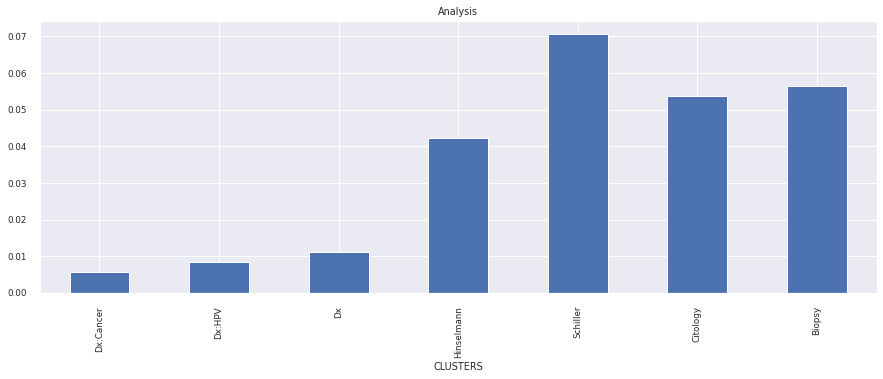

In [1108]:
# (cluster1[['Age',	'Number of sexual partners', 'First sexual intercourse', 'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
#  .mean().plot.bar(figsize=(15, 5)))
(cluster2[['Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
 .mean().plot.bar(figsize=(15, 5)))
plt.title('Analysis')
plt.xlabel('CLUSTERS')

## ***CLUSTER 3***

In [1109]:
cluster3 = read_data("cluster3.csv")
cluster3

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cluster
0,2,34,1.0,17.0,0,0,0,0,0,0,0,2
1,3,52,5.0,16.0,1,1,0,0,0,0,0,2
2,4,46,3.0,21.0,0,0,0,0,0,0,0,2
3,5,42,3.0,23.0,0,0,0,0,0,0,0,2
4,6,51,3.0,17.0,0,0,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
195,842,36,3.0,16.0,0,0,0,0,0,0,0,2
196,846,35,2.0,17.0,0,0,0,0,0,0,0,2
197,852,43,3.0,17.0,0,0,0,0,0,0,0,2
198,853,34,3.0,18.0,0,0,0,0,0,0,0,2


In [1110]:
cluster3.drop(cluster3.columns[[0]], axis = 1, inplace = True)

In [1111]:
cluster3.drop(['cluster'], axis = 1, inplace = True)

In [1112]:
cluster3

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,34,1.0,17.0,0,0,0,0,0,0,0
1,52,5.0,16.0,1,1,0,0,0,0,0
2,46,3.0,21.0,0,0,0,0,0,0,0
3,42,3.0,23.0,0,0,0,0,0,0,0
4,51,3.0,17.0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
195,36,3.0,16.0,0,0,0,0,0,0,0
196,35,2.0,17.0,0,0,0,0,0,0,0
197,43,3.0,17.0,0,0,0,0,0,0,0
198,34,3.0,18.0,0,0,0,0,0,0,0


In [1113]:
cluster3.describe(include = "all")

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,37.695000,2.665000,18.490000,0.040000,0.040000,0.035000,0.045000,0.140000,0.055000,0.095000
std,4.349317,1.117596,3.503035,0.196451,0.196451,0.184241,0.207824,0.347858,0.228552,0.293951
min,33.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,3.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,3.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.000000,6.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1114]:
#the risk factors are the features we are going to analyze
features = (cluster3.iloc[0:200, 0:30])

#the four diagnoses are the target variables
hinselmann = cluster3["Hinselmann"]
schiller = cluster3["Schiller"]
citology = cluster3["Citology"]
biopsy = cluster3["Biopsy"]

In [1115]:
#define a dictionary of estimators for model
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Support Vector Machine': LinearSVC(max_iter=1000000),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()}

In [1116]:
#function that splits the data using percentage split (75% train 25% test)
def split_data(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)
    return X_train, X_test, y_train, y_test

In [1117]:
#split the data using percentage split
X_train_h, X_test_h, y_train_h, y_test_h = split_data(features, hinselmann)
X_train_s, X_test_s, y_train_s, y_test_s = split_data(features, schiller)
X_train_c, X_test_c, y_train_c, y_test_c = split_data(features, citology)
X_train_b, X_test_b, y_train_b, y_test_b = split_data(features, biopsy)

In [1118]:
# preprocess using MinMaxScaler
def preprocessor(train, test):
    scaler = MinMaxScaler().fit(train)
    
    #scale testing and training sets
    X_train_scaled = scaler.transform(train)
    X_test_scaled = scaler.transform(test)

    return X_train_scaled, X_test_scaled

In [1119]:
#preprocess the data
X_train_h_scaled, X_test_h_scaled = preprocessor(X_train_h, X_test_h)
X_train_s_scaled, X_test_s_scaled = preprocessor(X_train_s, X_test_s)
X_train_c_scaled, X_test_c_scaled = preprocessor(X_train_c, X_test_c)
X_train_b_scaled, X_test_b_scaled = preprocessor(X_train_b, X_test_b)

In [1120]:
#define dictionary of feature selection methods
feat_select_dict = {"UNI" : SelectKBest(score_func=f_classif, k = 3),
                    "MB" : SelectFromModel(DecisionTreeRegressor(random_state = 3000)),
                   "RFE" : RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)}

In [1121]:
#set up dataframes to hold results of selecting features vs using all of the features
prelim_train_results = pd.DataFrame(index = ["Acc_All", "Acc_UNI", "Acc_MB", "Acc_RFE"])
prelim_test_results = pd.DataFrame(index = ["Acc_All", "Acc_UNI", "Acc_MB", "Acc_RFE"])

In [1122]:
#remove columns that are not the selected features
def select_features_in_data(x, features, columns_list):
    x_selected = pd.DataFrame(x, columns = features)
    return x_selected

In [1123]:
X_train_h_selected = select_features_in_data(X_train_h_scaled, list(features.columns), features_list)
X_test_h_selected = select_features_in_data(X_test_h_scaled, list(features.columns), features_list)
X_train_s_selected = select_features_in_data(X_train_s_scaled, list(features.columns), features_list)
X_test_s_selected = select_features_in_data(X_test_s_scaled, list(features.columns), features_list)
X_train_c_selected = select_features_in_data(X_train_c_scaled, list(features.columns), features_list)
X_test_c_selected = select_features_in_data(X_test_c_scaled, list(features.columns), features_list)
X_train_b_selected = select_features_in_data(X_train_b_scaled, list(features.columns), features_list)
X_test_b_selected = select_features_in_data(X_test_b_scaled, list(features.columns), features_list)

In [1124]:
#CLEANING: clean up strings so they can used as numbers
for columns in cluster3:
    cluster3[columns] = pd.to_numeric(cluster3[columns])

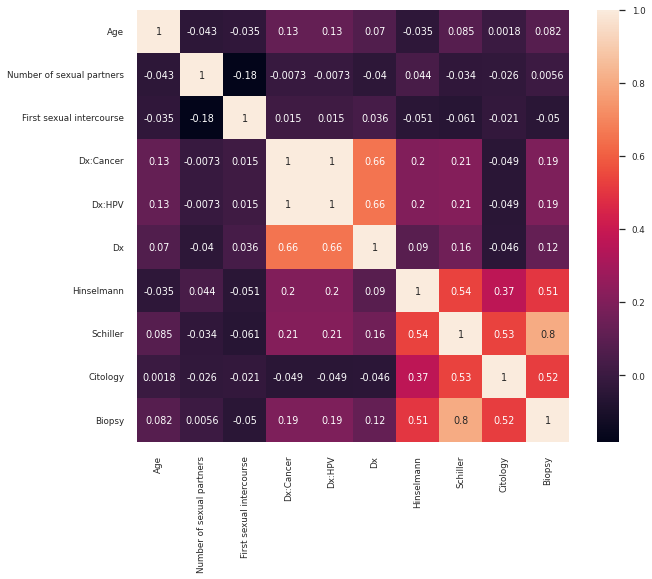

In [1125]:
# generate the heatmap to visualize the correlation between each variable

# heatmap showing correlations between all variables
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(cluster3.corr(), square=True, annot=True)
plt.subplots_adjust(bottom=0.28)
plt.show()

In [1126]:
cluster3_selected_data = cluster3
cluster3_selected_data

,Age,Number of sexual partners,First sexual intercourse,Dx:Cancer,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,34,1.0,17.0,0,0,0,0,0,0,0
1,52,5.0,16.0,1,1,0,0,0,0,0
2,46,3.0,21.0,0,0,0,0,0,0,0
3,42,3.0,23.0,0,0,0,0,0,0,0
4,51,3.0,17.0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
195,36,3.0,16.0,0,0,0,0,0,0,0
196,35,2.0,17.0,0,0,0,0,0,0,0
197,43,3.0,17.0,0,0,0,0,0,0,0
198,34,3.0,18.0,0,0,0,0,0,0,0


In [1127]:
cluster3_selected_data_accuracy = pd.DataFrame(index=["Accuracy-Selected", "Accuracy-All"])
cluster3_selected_data_f1 = pd.DataFrame(index=["F1 Score-Selected", "F1 Score-All"])

In [1128]:
#function that applies the algorithms to the data
def apply_algorithms(target, features, x_train, x_test, ytrain, ytest):
    for estimator_name, estimator_object in estimators.items():
        #fit scaled sets to model
        estimator_object.fit(X=x_train, y=ytrain)
        #make predictions on the test set
        predicted = estimator_object.predict(X=x_test)
        expected = ytest
        #display classification metric results
        accuracy = estimator_object.score(x_test, ytest)
        f1score = f1_score(y_true=expected, y_pred=predicted, average=None)[0]
        cluster3_selected_data_accuracy.loc["Accuracy-" + features, target + ": " + estimator_name] = accuracy
        cluster3_selected_data_f1.loc["F1 Score-" + features, target + ": " + estimator_name] = f1score
        print(target)
        print(estimator_name + ": \n\t" + "Prediction accuracy on the test data:", f"{accuracy:.2%}" + "\n")
        print("\tF1 Score: " + str(f1score) + "\n")

In [1129]:
#results
print('TEST RESULTS WHEN ONLY SELECTED FEATURES USED:')
print('___________________________________________\n')
print('With Selected Features')
apply_algorithms("Hinselmann", "Selected", X_train_h_selected, X_test_h_selected, y_train_h, y_test_h)
apply_algorithms("Schiller", "Selected", X_train_s_selected, X_test_s_selected, y_train_s, y_test_s)
apply_algorithms("Citology", "Selected", X_train_c_selected, X_test_c_selected, y_train_c, y_test_c)
apply_algorithms("Biopsy", "Selected", X_train_b_selected, X_test_b_selected, y_train_b, y_test_b)
print('\nTEST RESULTS WHEN ALL FEATURES USED:')
print('____________________________________\n')
print('With All Features')
apply_algorithms("Hinselmann", "All", X_train_h_scaled, X_test_h_scaled, y_train_h, y_test_h)
apply_algorithms("Schiller", "All", X_train_s_scaled, X_test_s_scaled, y_train_s, y_test_s)
apply_algorithms("Citology", "All", X_train_c_scaled, X_test_c_scaled, y_train_c, y_test_c)
apply_algorithms("Biopsy", "All", X_train_b_scaled, X_test_b_scaled, y_train_b, y_test_b)

TEST RESULTS WHEN ONLY SELECTED FEATURES USED:
___________________________________________

With Selected Features
Hinselmann
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 98.00%

	F1 Score: 0.9896907216494846

Hinselmann
Support Vector Machine: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Hinselmann
Logistic Regression: 
	Prediction accuracy on the test data: 98.00%

	F1 Score: 0.9896907216494846

Hinselmann
Decision Tree: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
Support Vector Machine: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
Logistic Regression: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Schiller
Decision Tree: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Citology
k-Nearest Neighbor: 
	Prediction accuracy on the test data: 100.00%

	F1 Score: 1.0

Cit

In [1130]:
cluster3_selected_data_accuracy

,Hinselmann: k-Nearest Neighbor,Hinselmann: Support Vector Machine,Hinselmann: Logistic Regression,Hinselmann: Decision Tree,Schiller: k-Nearest Neighbor,Schiller: Support Vector Machine,Schiller: Logistic Regression,Schiller: Decision Tree,Citology: k-Nearest Neighbor,Citology: Support Vector Machine,Citology: Logistic Regression,Citology: Decision Tree,Biopsy: k-Nearest Neighbor,Biopsy: Support Vector Machine,Biopsy: Logistic Regression,Biopsy: Decision Tree
Accuracy-Selected,0.98,1.0,0.98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.98,1.0,1.0,1.0
Accuracy-All,0.98,1.0,0.98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.98,1.0,1.0,1.0


In [1131]:
cluster3_selected_data_accuracy.mean(axis = 1)

Accuracy-Selected    0.99625
Accuracy-All         0.99625
dtype: float64

In [1132]:
#Calculate average by algorithm
def calc_avg_for_algorithms(df, algorithm):
    list = [column for column in df.columns.tolist() if algorithm in column]
    return pd.DataFrame(data = df[list]).mean(axis = 1)

In [1133]:
average_accuracies = {"KNN" : calc_avg_for_algorithms(cluster3_selected_data_accuracy, "Neighbor"),
            "SVM": calc_avg_for_algorithms(cluster3_selected_data_accuracy, "Support"),
            "Logistic Regression": calc_avg_for_algorithms(cluster3_selected_data_accuracy, "Logistic"),
            "Decision Tree": calc_avg_for_algorithms(cluster3_selected_data_accuracy, "Decision Tree")}

In [1134]:
pd.DataFrame(average_accuracies)

,KNN,SVM,Logistic Regression,Decision Tree
Accuracy-Selected,0.99,1.0,0.995,1.0
Accuracy-All,0.99,1.0,0.995,1.0


In [1135]:
cluster3_selected_data_f1

,Hinselmann: k-Nearest Neighbor,Hinselmann: Support Vector Machine,Hinselmann: Logistic Regression,Hinselmann: Decision Tree,Schiller: k-Nearest Neighbor,Schiller: Support Vector Machine,Schiller: Logistic Regression,Schiller: Decision Tree,Citology: k-Nearest Neighbor,Citology: Support Vector Machine,Citology: Logistic Regression,Citology: Decision Tree,Biopsy: k-Nearest Neighbor,Biopsy: Support Vector Machine,Biopsy: Logistic Regression,Biopsy: Decision Tree
F1 Score-Selected,0.989691,1.0,0.989691,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.988764,1.0,1.0,1.0
F1 Score-All,0.989691,1.0,0.989691,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.988764,1.0,1.0,1.0


In [1136]:
cluster3_selected_data_f1.mean(axis = 1)

F1 Score-Selected    0.998009
F1 Score-All         0.998009
dtype: float64

In [1137]:
average_f1s = {"KNN" : calc_avg_for_algorithms(cluster3_selected_data_f1, "Neighbor"),
            "SVM": calc_avg_for_algorithms(cluster3_selected_data_f1, "Support"),
            "Logistic Regression": calc_avg_for_algorithms(cluster3_selected_data_f1, "Logistic"),
            "Decision Tree": calc_avg_for_algorithms(cluster3_selected_data_f1, "Decision Tree")}

In [1138]:
#display dataframe of average f1 scores by algorithm
pd.DataFrame(average_f1s)

,KNN,SVM,Logistic Regression,Decision Tree
F1 Score-Selected,0.994614,1.0,0.997423,1.0
F1 Score-All,0.994614,1.0,0.997423,1.0


Text(0.5, 0, 'CLUSTERS')

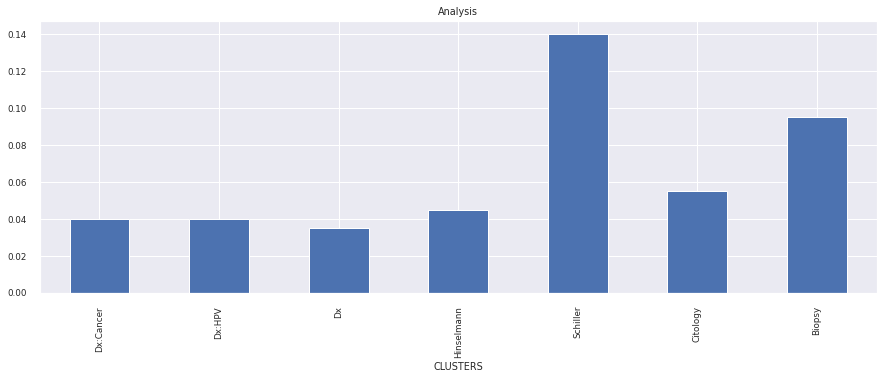

In [1139]:
# (cluster1[['Age',	'Number of sexual partners', 'First sexual intercourse', 'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
#  .mean().plot.bar(figsize=(15, 5)))
(cluster3[['Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
 .mean().plot.bar(figsize=(15, 5)))
plt.title('Analysis')
plt.xlabel('CLUSTERS')

In [1140]:
import pickle

In [1141]:
def make_model(model, filename):
  pickle.dump(model, open(filename, 'wb'))
  print(model, filename)

In [1142]:
model1=KNeighborsClassifier()
model1.fit(X_train_b, y_train_b)
make_model(model1, "KNeighborsClassifier.pkl")

KNeighborsClassifier() KNeighborsClassifier.pkl


In [1143]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)

In [1144]:
k_range = range(1, 150)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_b, y_train_b)
    y_pred = knn.predict(X_test_b)
    scores.append(metrics.accuracy_score(y_test_b, y_pred))

print(scores)

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]


Text(0, 0.5, 'Testing Accuracy')

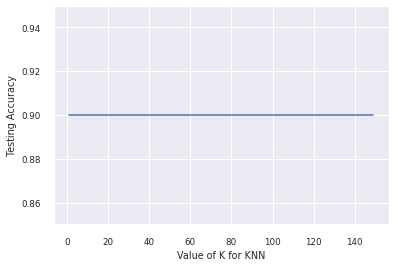

In [1145]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [1146]:
model2=LinearSVC(max_iter=1000000)
model2.fit(X_train_b, y_train_b)
make_model(model2, "LinearSVC.pkl")

LinearSVC(max_iter=1000000) LinearSVC.pkl


In [1147]:
model3=LogisticRegression()
model3.fit(X_train_b, y_train_b)
make_model(model3, "LogisticRegression.pkl")

LogisticRegression() LogisticRegression.pkl


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


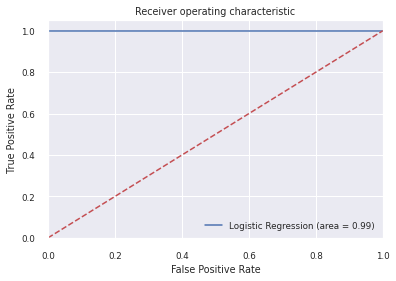

In [1148]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_b, model3.predict(X_test_b_selected))
fpr, tpr, thresholds = roc_curve(y_test_b, model3.predict_proba(X_test_b_selected)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1149]:
model4=DecisionTreeClassifier()
model4.fit(X_train_b, y_train_b)
make_model(model4, "DecisionTreeClassifier.pkl")

DecisionTreeClassifier() DecisionTreeClassifier.pkl


In [1150]:
from sklearn.metrics import accuracy_score
for x in max_depth_list :

  dtc =DecisionTreeClassifier(max_depth=x)
  dtc.fit(X_train_b,y_train_b)

  train_z = dtc.predict(X_train_b)
  train_z_prob = dtc.predict_proba(X_train_b)[:,1]

  test_z = dtc.predict(X_test_b_selected)
  test_z_prob = dtc.predict_proba(X_test_b_selected)[:,1]

  print("split: {}".format(x))
  print("model accuracy: {}".format(accuracy_score(y_test_b, test_z)))

split: 1
model accuracy: 1.0
split: 2
model accuracy: 1.0
split: 3
model accuracy: 1.0
split: 4
model accuracy: 1.0


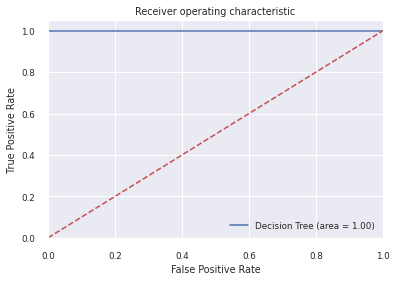

In [1151]:
logit_roc_auc = roc_auc_score(y_test_b, model4.predict(X_test_b_selected))
fpr, tpr, thresholds = roc_curve(y_test_b, model4.predict_proba(X_test_b_selected)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1152]:
example = np.array([[40, 1, 18, 0, 0, 0, 1, 1, 1, 1]])

In [1153]:
prediction=model1.predict(example)
print(prediction)
loaded_model = pickle.load(open("KNeighborsClassifier.pkl", 'rb'))
prediction=loaded_model.predict(example)
print(prediction)

[0]
[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [1154]:
prediction=model2.predict(example)
print(prediction)
loaded_model = pickle.load(open("LinearSVC.pkl", 'rb'))
prediction=loaded_model.predict(example)
print(prediction)

[1]
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


In [1155]:
prediction=model3.predict(example)
print(prediction)
loaded_model = pickle.load(open("LogisticRegression.pkl", 'rb'))
prediction=loaded_model.predict(example)
print(prediction)

[1]
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [1156]:
prediction=model4.predict(example)
print(prediction)
loaded_model = pickle.load(open("DecisionTreeClassifier.pkl", 'rb'))
prediction=loaded_model.predict(example)
print(prediction)

[1]
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
